In [ ]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def extract_precipitation(file_path, target_lat, target_lon):
    try:
        dataset = nc.Dataset(file_path, 'r')
        print(f"Arquivo {file_path} aberto com sucesso.")
    except OSError as e:
        print(f"Erro ao abrir o arquivo: {e}")
        return None

    # Extrair variáveis
    latitudes = dataset.variables['lat'][:]
    longitudes = dataset.variables['lon'][:]
    times = dataset.variables['time'][:]
    precipitation = dataset.variables['pr'][:]

    # Verificar se as coordenadas exatas estão presentes
    if target_lat not in latitudes or target_lon not in longitudes:
        print(f"Coordenadas exatas não encontradas no arquivo: {file_path}")
        dataset.close()
        return None

    # Encontrar os índices correspondentes às coordenadas exatas
    lat_index = np.where(latitudes == target_lat)[0][0]
    lon_index = np.where(longitudes == target_lon)[0][0]
    print(f"Coordenadas exatas encontradas: Latitude {latitudes[lat_index]}, Longitude {longitudes[lon_index]}")

    # Conversão do tempo
    time_units = dataset.variables['time'].units
    reference_date_str = time_units.split('since')[1].strip()
    reference_date = datetime.strptime(reference_date_str, "%Y-%m-%dT%H:%M:%S")
    dates = [reference_date + timedelta(days=float(t)) for t in times]

    # Inicializar lista para armazenar a série temporal de precipitação
    precipitation_series = []

    def get_valid_precipitation(t_index, lat_index, lon_index):
        try:
            value = precipitation[t_index, lat_index, lon_index]
            if np.ma.is_masked(value) or np.isnan(value):
                return None
            return float(value)
        except IndexError:
            print(f"Erro de índice: t_index={t_index}, lat_index={lat_index}, lon_index={lon_index}")
            return None

    # Coletar a precipitação para a localização exata
    for t_index in range(len(dates)):
        mean_precipitation = get_valid_precipitation(t_index, lat_index, lon_index)
        if mean_precipitation is not None:
            precipitation_series.append((dates[t_index], mean_precipitation))

    dataset.close()
    return precipitation_series

# Coordenadas para Florianópolis (substitua pelas coordenadas exatas desejadas)
target_lat = -27.625
target_lon = -48.875

# Caminhos dos arquivos
files = {
    'Histórico': 'EnsembleBC-19-Final-Mean-pr-hist.nc',
    'SSP245': 'BC-EnsembleRaw-19-Final-Mean-pr-ssp245-interp.nc',
    'SSP585': 'BC-EnsembleRaw-19-Final-Mean-pr-ssp585-interp.nc'
}

# Extrair dados e exibir resultados
data = {}
for label, file_path in files.items():
    series = extract_precipitation(file_path, target_lat, target_lon)
    if series:
        dates, values = zip(*series)
        data[label] = pd.DataFrame({'date': dates, 'precipitation': values})
    else:
        print(f"Não foi possível extrair dados do arquivo: {file_path}")

# Plotar as séries temporais
plt.figure(figsize=(12, 6))
for label, df in data.items():
    if not df.empty:
        plt.plot(df['date'], df['precipitation'], marker='o', linestyle='-', label=label)

plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.title(f'Comparação das Séries Temporais de Precipitação em ({target_lat}, {target_lon})')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import netCDF4 as nc

# Função para listar coordenadas de um arquivo NetCDF
def list_coordinates(file_path):
    try:
        dataset = nc.Dataset(file_path, 'r')
        print(f"\nArquivo {file_path} aberto com sucesso.")
    except OSError as e:
        print(f"Erro ao abrir o arquivo: {e}")
        return None

    # Extrair as latitudes e longitudes
    latitudes = dataset.variables['lat'][:]
    longitudes = dataset.variables['lon'][:]

    # Exibir as coordenadas
    print(f"Latitudes: {latitudes}")
    print(f"Longitudes: {longitudes}")

    dataset.close()

# Caminhos dos arquivos
files = [
    'BC-EnsembleRaw-19-Final-Mean-pr-ssp585-interp.nc'
]

# Listar coordenadas para cada arquivo
for file_path in files:
    list_coordinates(file_path)

In [ ]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def extract_precipitation(file_path, target_lat, target_lon):
    try:
        dataset = nc.Dataset(file_path, 'r')
        print(f"Arquivo {file_path} aberto com sucesso.")
    except OSError as e:
        print(f"Erro ao abrir o arquivo: {e}")
        return None

    # Extrair variáveis
    latitudes = dataset.variables['lat'][:]
    longitudes = dataset.variables['lon'][:]
    times = dataset.variables['time'][:]
    precipitation = dataset.variables['pr'][:]

    # Verificar se as coordenadas exatas estão presentes
    if target_lat not in latitudes or target_lon not in longitudes:
        print(f"Coordenadas exatas não encontradas no arquivo: {file_path}")
        dataset.close()
        return None

    # Encontrar os índices correspondentes às coordenadas exatas
    lat_index = np.where(latitudes == target_lat)[0][0]
    lon_index = np.where(longitudes == target_lon)[0][0]
    print(f"Coordenadas exatas encontradas: Latitude {latitudes[lat_index]}, Longitude {longitudes[lon_index]}")

    # Conversão do tempo
    time_units = dataset.variables['time'].units
    reference_date_str = time_units.split('since')[1].strip()
    reference_date = datetime.strptime(reference_date_str, "%Y-%m-%dT%H:%M:%S")
    dates = [reference_date + timedelta(days=float(t)) for t in times]

    # Inicializar lista para armazenar a série temporal de precipitação
    precipitation_series = []

    def get_valid_precipitation(t_index, lat_index, lon_index):
        try:
            value = precipitation[t_index, lat_index, lon_index]
            if np.ma.is_masked(value) or np.isnan(value):
                return None
            return float(value)
        except IndexError:
            print(f"Erro de índice: t_index={t_index}, lat_index={lat_index}, lon_index={lon_index}")
            return None

    # Coletar a precipitação para a localização exata
    for t_index in range(len(dates)):
        mean_precipitation = get_valid_precipitation(t_index, lat_index, lon_index)
        if mean_precipitation is not None:
            precipitation_series.append((dates[t_index], mean_precipitation))

    dataset.close()
    return precipitation_series

# Coordenadas para Florianópolis (substitua pelas coordenadas exatas desejadas)
target_lat = -27.625
target_lon = -48.875

# Caminhos dos arquivos
files = {
    'Histórico': 'HadGEM3-GC31-LL-pr-hist.nc',
    'SSP245': 'HadGEM3-GC31-LL-pr-ssp245.nc',
    'SSP585': 'HadGEM3-GC31-LL-pr-ssp585.nc'
}

# Extrair dados e exibir resultados
data = {}
for label, file_path in files.items():
    series = extract_precipitation(file_path, target_lat, target_lon)
    if series:
        dates, values = zip(*series)
        data[label] = pd.DataFrame({'date': dates, 'precipitation': values})
    else:
        print(f"Não foi possível extrair dados do arquivo: {file_path}")

# Plotar as séries temporais
plt.figure(figsize=(12, 6))
for label, df in data.items():
    if not df.empty:
        plt.plot(df['date'], df['precipitation'], marker='o', linestyle='-', label=label)

plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.title(f'Comparação das Séries Temporais de Precipitação em ({target_lat}, {target_lon})')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

def extract_precipitation(file_path, target_lat, target_lon):
    try:
        dataset = nc.Dataset(file_path, 'r')
        print(f"Arquivo {file_path} aberto com sucesso.")
    except OSError as e:
        print(f"Erro ao abrir o arquivo: {e}")
        return None

    latitudes = dataset.variables['lat'][:]
    longitudes = dataset.variables['lon'][:]
    times = dataset.variables['time'][:]
    precipitation = dataset.variables['pr'][:]

    # Verificar se as coordenadas exatas estão presentes
    if target_lat not in latitudes or target_lon not in longitudes:
        print(f"Coordenadas exatas não encontradas no arquivo: {file_path}")
        dataset.close()
        return None

    lat_index = np.where(latitudes == target_lat)[0][0]
    lon_index = np.where(longitudes == target_lon)[0][0]

    time_units = dataset.variables['time'].units
    reference_date_str = time_units.split('since')[1].strip()
    reference_date = datetime.strptime(reference_date_str, "%Y-%m-%dT%H:%M:%S")
    dates = [reference_date + timedelta(days=float(t)) for t in times]

    precipitation_series = []

    def get_valid_precipitation(t_index, lat_index, lon_index):
        try:
            value = precipitation[t_index, lat_index, lon_index]
            if np.ma.is_masked(value) or np.isnan(value):
                return None
            return float(value)
        except IndexError:
            print(f"Erro de índice: t_index={t_index}, lat_index={lat_index}, lon_index={lon_index}")
            return None

    for t_index in range(len(dates)):
        mean_precipitation = get_valid_precipitation(t_index, lat_index, lon_index)
        if mean_precipitation is not None:
            precipitation_series.append((dates[t_index], mean_precipitation))

    dataset.close()
    return precipitation_series

def calculate_indices(df):
    df['year'] = df['date'].dt.year
    df_wet_days = df[df['precipitation'] >= 1]

    # PRCPTOT: Total anual de precipitação em dias úmidos (precipitação >= 1 mm)
    prcptot = df_wet_days.groupby('year')['precipitation'].sum()

    # R95p: Total anual de precipitação para dias > 95th percentile
    r95_threshold = df['precipitation'].quantile(0.95)
    r95p = df[df['precipitation'] > r95_threshold].groupby('year')['precipitation'].sum()

    # RX1day: Máxima precipitação em 1 dia
    rx1day = df.groupby('year')['precipitation'].max()

    # RX5day: Máxima precipitação em 5 dias consecutivos (ajustado)
    df['rolling_5day'] = df['precipitation'].rolling(window=5, min_periods=1).sum()
    rx5day = df.groupby('year')['rolling_5day'].max()

    # SDII: Índice de intensidade diária simples (total de precipitação / dias úmidos)
    sdii = df_wet_days.groupby('year')['precipitation'].mean()

    # R20mm: Contagem anual de dias em que a precipitação excede 20 mm
    r20mm = df[df['precipitation'] > 20].groupby('year').size()

    # CDD: Máximo número de dias consecutivos secos
    df['dry'] = df['precipitation'] < 1
    cdd = df.groupby('year')['dry'].apply(lambda x: x.astype(int).groupby((x != x.shift()).cumsum()).sum().max())

    # CWD: Máximo número de dias consecutivos úmidos
    df['wet'] = df['precipitation'] >= 1
    cwd = df.groupby('year')['wet'].apply(lambda x: x.astype(int).groupby((x != x.shift()).cumsum()).sum().max())

    # Criar um DataFrame com todas as estatísticas
    result_df = pd.DataFrame({
        'PRCPTOT': prcptot,
        'R95p': r95p,
        'RX1day': rx1day,
        'RX5day': rx5day,
        'SDII': sdii,
        'R20mm': r20mm,
        'CDD': cdd,
        'CWD': cwd
    }).reset_index()

    return result_df

# Coordenadas para Florianópolis
target_lat = -27.625
target_lon = -48.875

# Caminhos dos arquivos
files = {
    'Histórico': 'HadGEM3-GC31-LL-pr-hist.nc',
    'SSP245': 'HadGEM3-GC31-LL-pr-ssp245.nc',
    'SSP585': 'HadGEM3-GC31-LL-pr-ssp585.nc'
}

# Extrair dados e calcular índices
indices = {}
for label, file_path in files.items():
    series = extract_precipitation(file_path, target_lat, target_lon)
    if series:
        dates, values = zip(*series)
        df = pd.DataFrame({'date': dates, 'precipitation': values})
        indices[label] = calculate_indices(df)
    else:
        print(f"Não foi possível extrair dados do arquivo: {file_path}")

# Exibir resultados
for label, df in indices.items():
    print(f"\nEstatísticas anuais para {label}:")
    print(df)

# Plotar a variação dos índices PRCPTOT para comparação
plt.figure(figsize=(12, 6))
for label, df in indices.items():
    plt.plot(df['year'], df['PRCPTOT'], marker='o', linestyle='-', label=label)

plt.xlabel('Ano')
plt.ylabel('PRCPTOT (mm)')
plt.title(f'Comparação das Séries Temporais Anuais de PRCPTOT em ({target_lat}, {target_lon})')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle(f'Comparação dos Índices Climáticos em ({target_lat}, {target_lon})', fontsize=16)

index_labels = ['PRCPTOT', 'R95p', 'RX1day', 'RX5day', 'SDII', 'R20mm', 'CDD', 'CWD']
subplot_positions = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]

for i, label in enumerate(index_labels):
    ax = axes[subplot_positions[i][0], subplot_positions[i][1]]
    for scenario, df in indices.items():
        ax.plot(df['year'], df[label], marker='o', linestyle='-', label=scenario)
    ax.set_title(label)
    ax.set_xlabel('Ano')
    ax.set_ylabel(label)
    ax.grid(True)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Modelos específicos

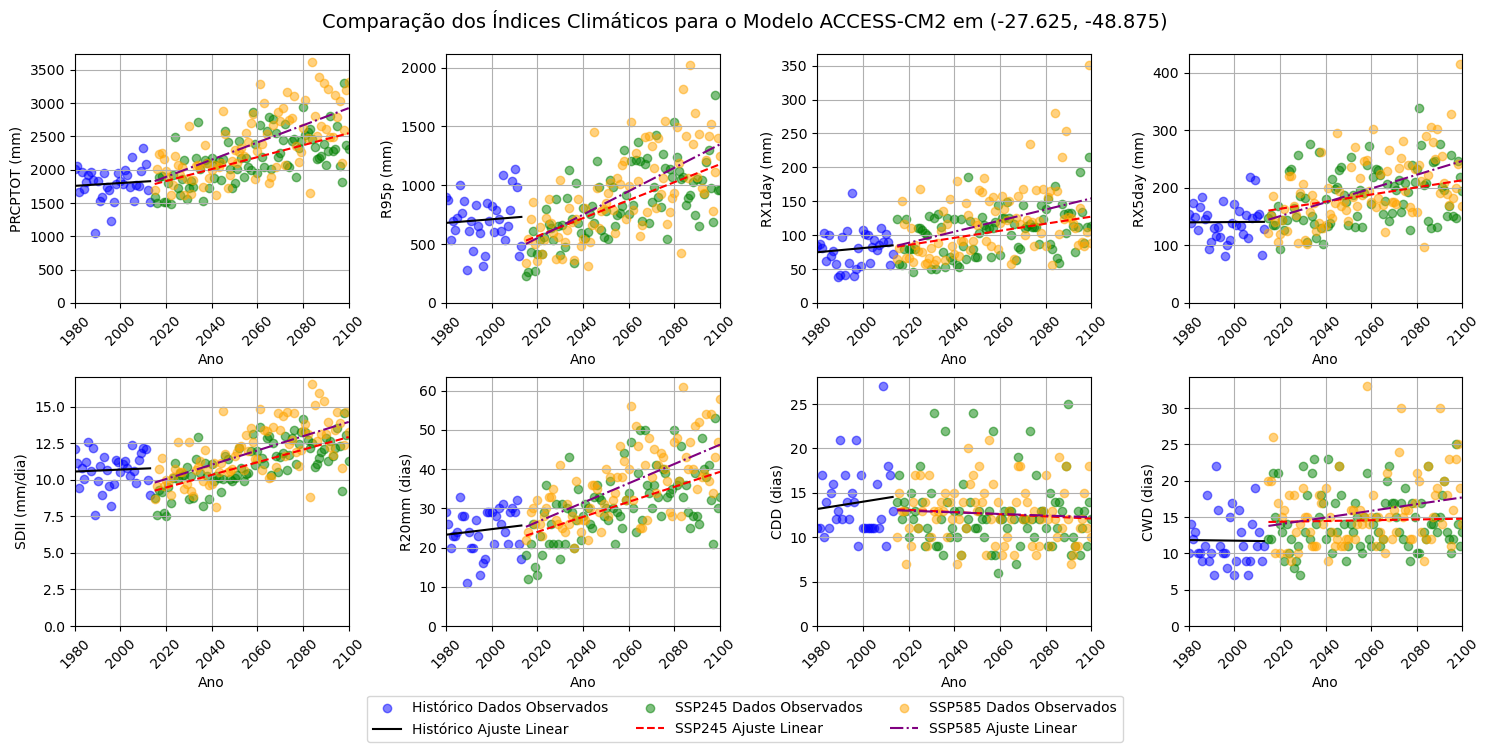

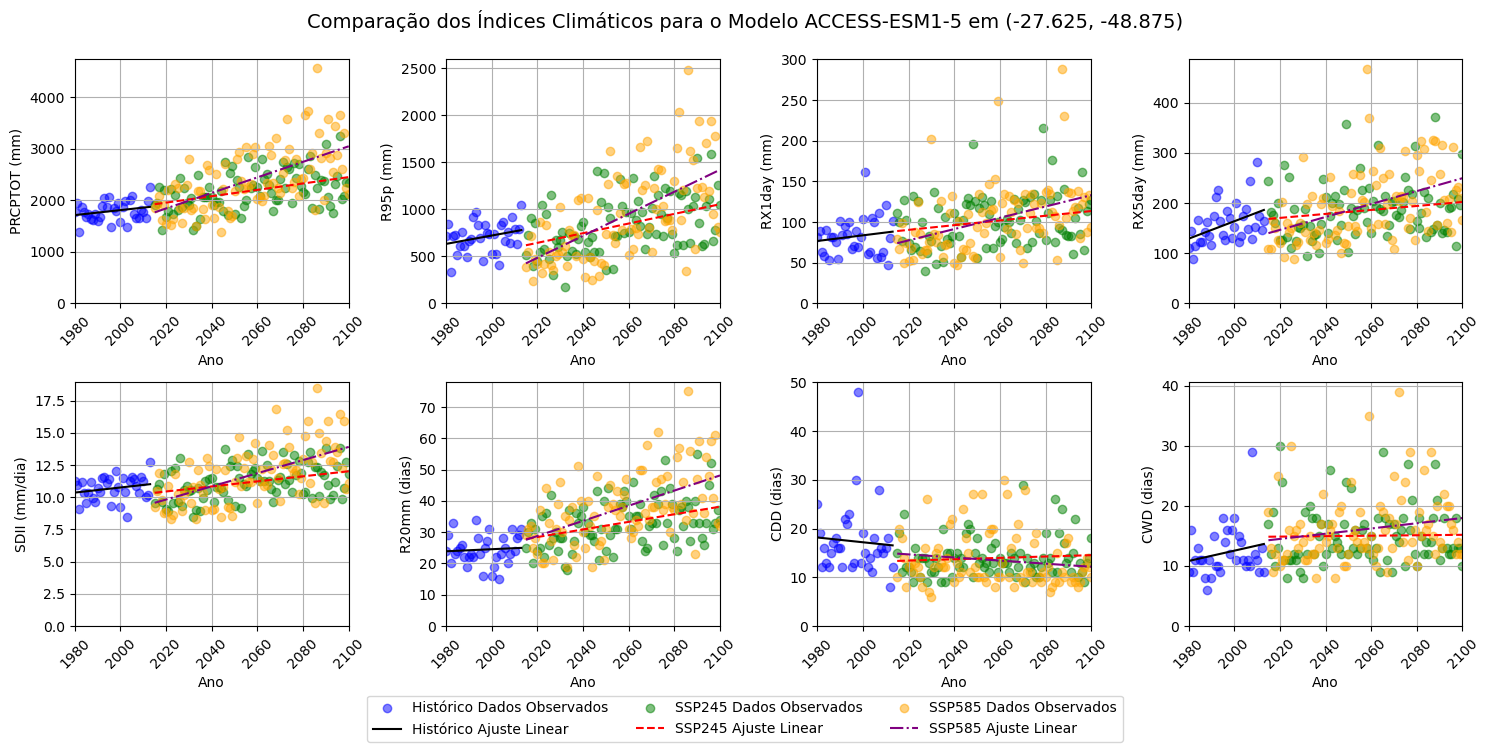

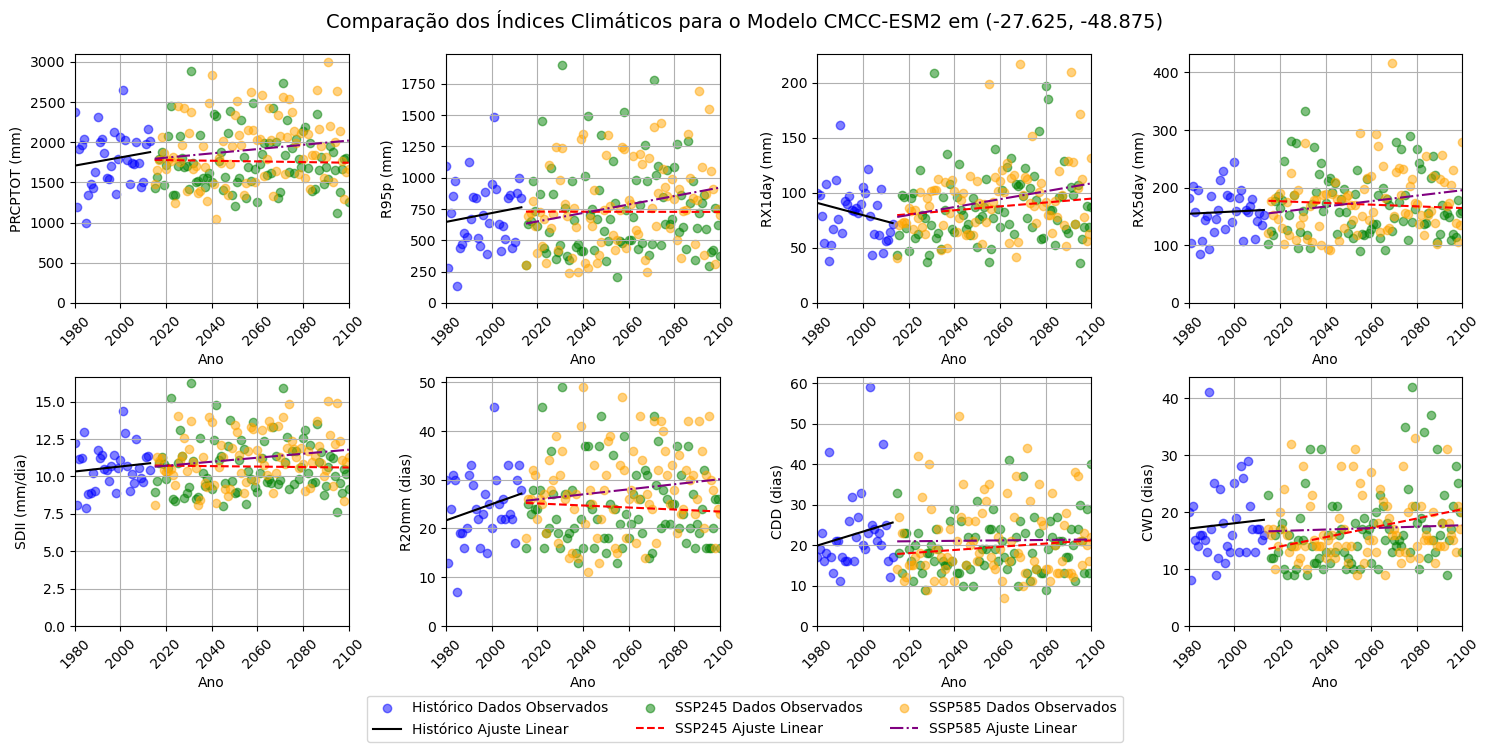

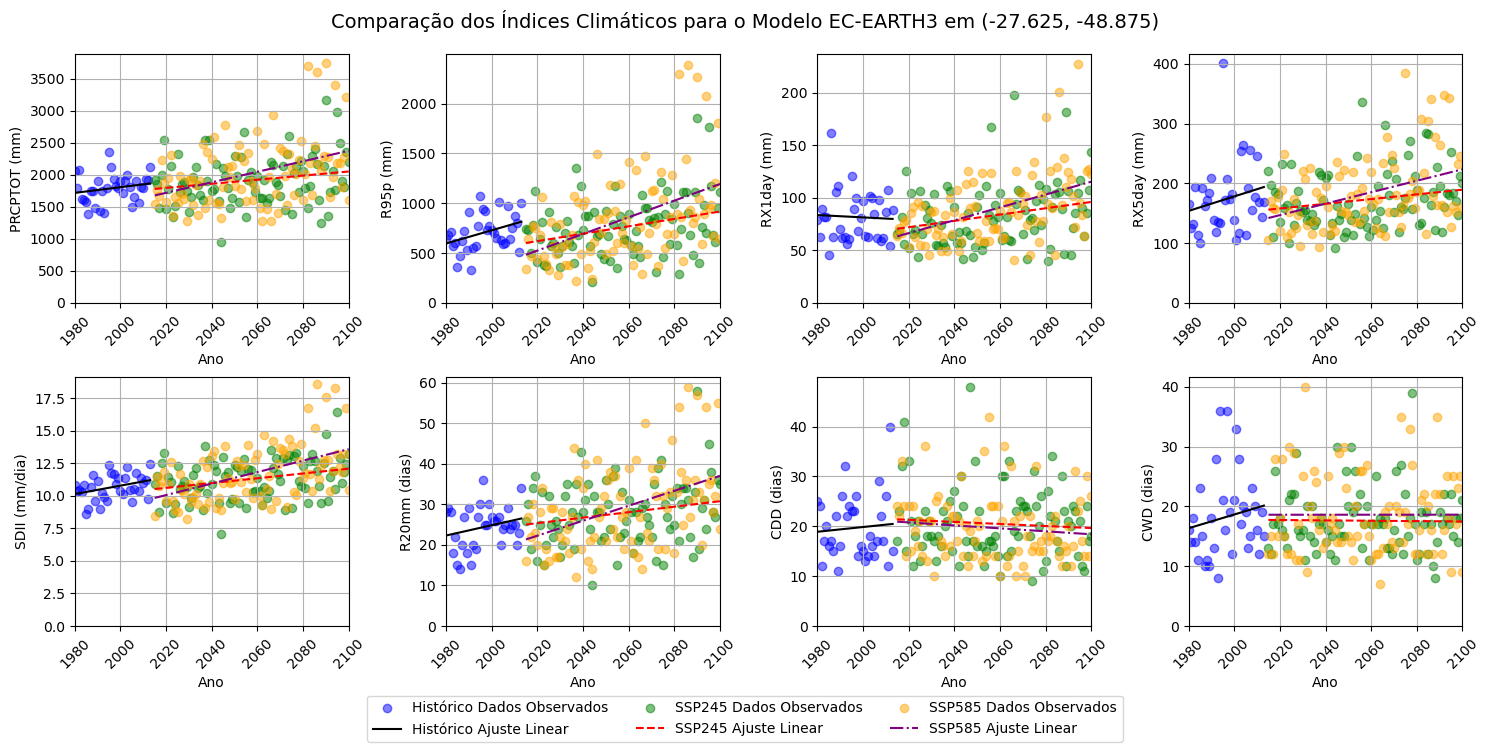

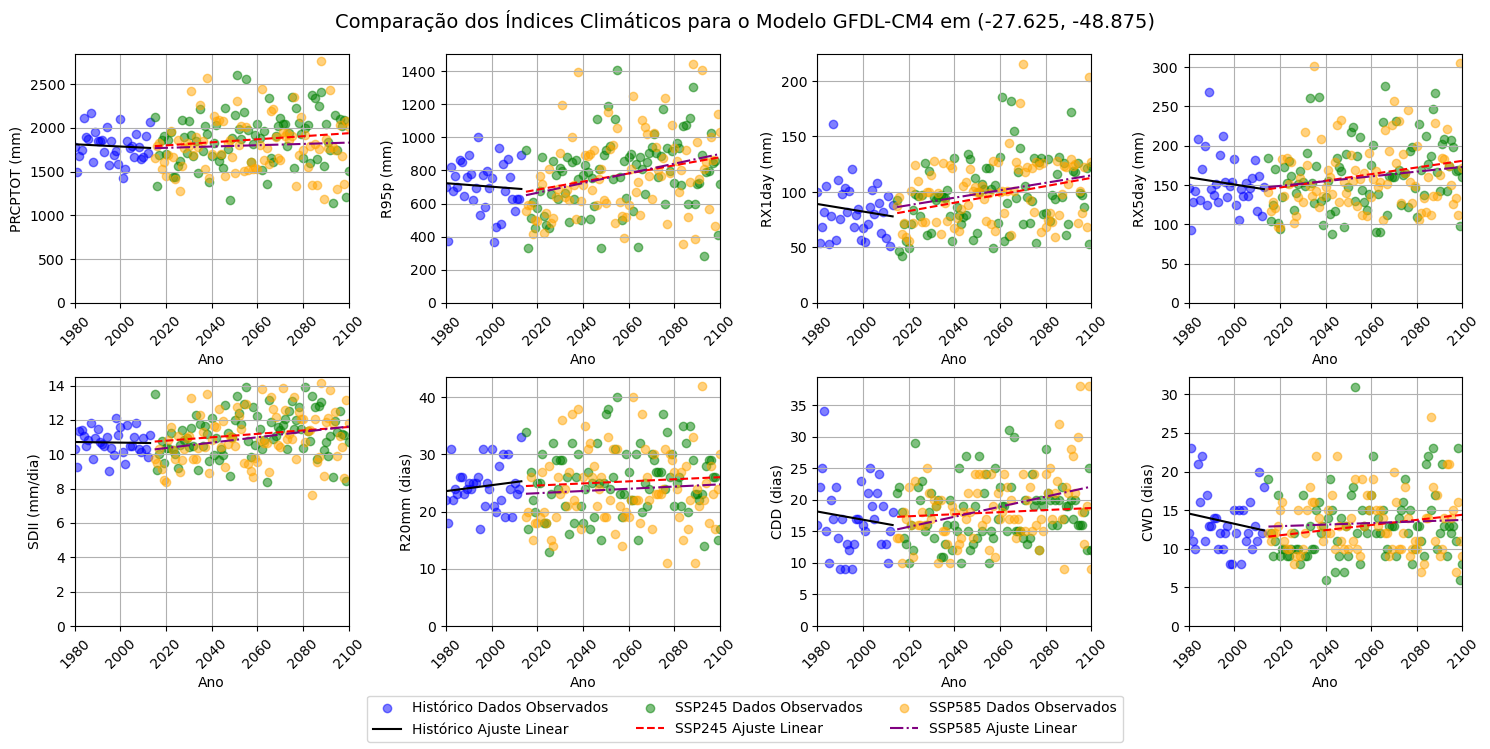

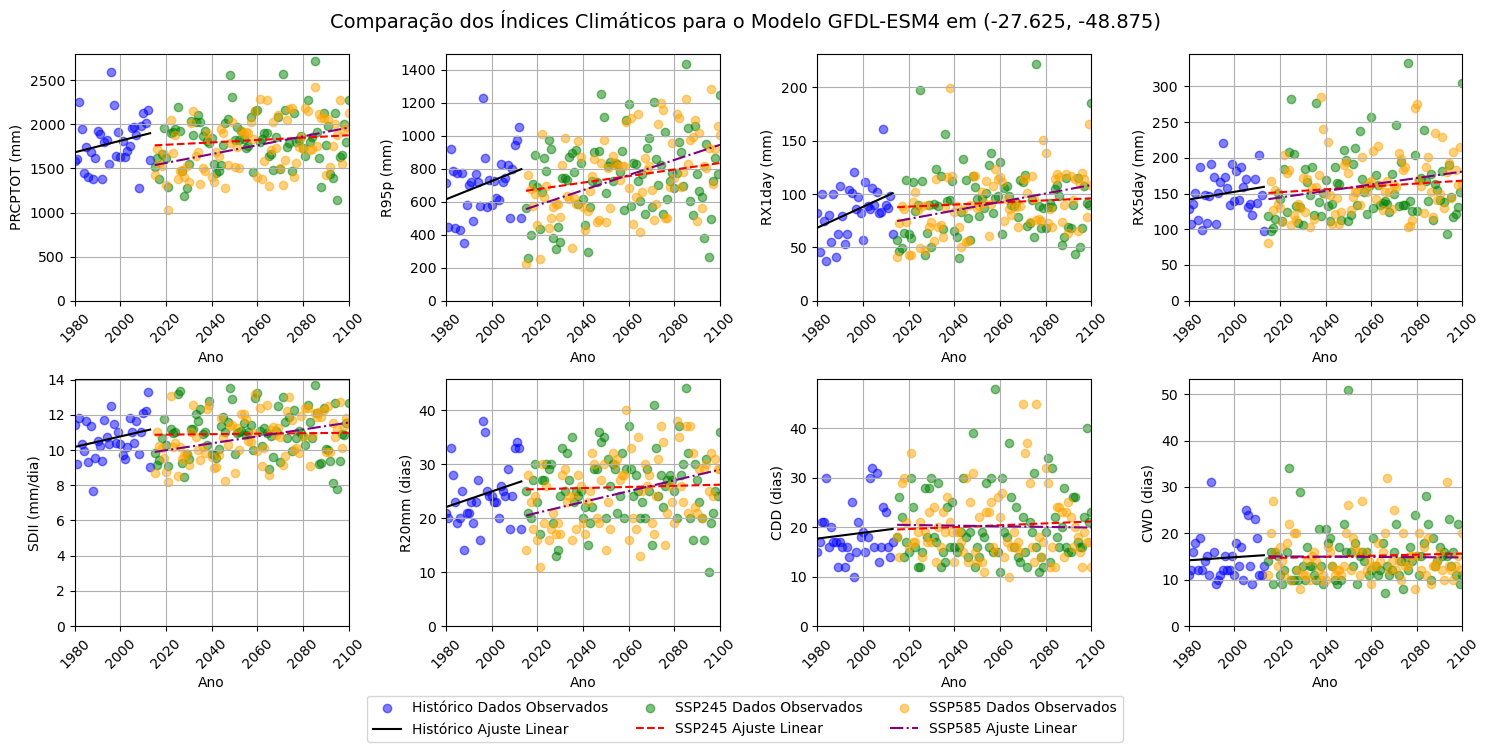

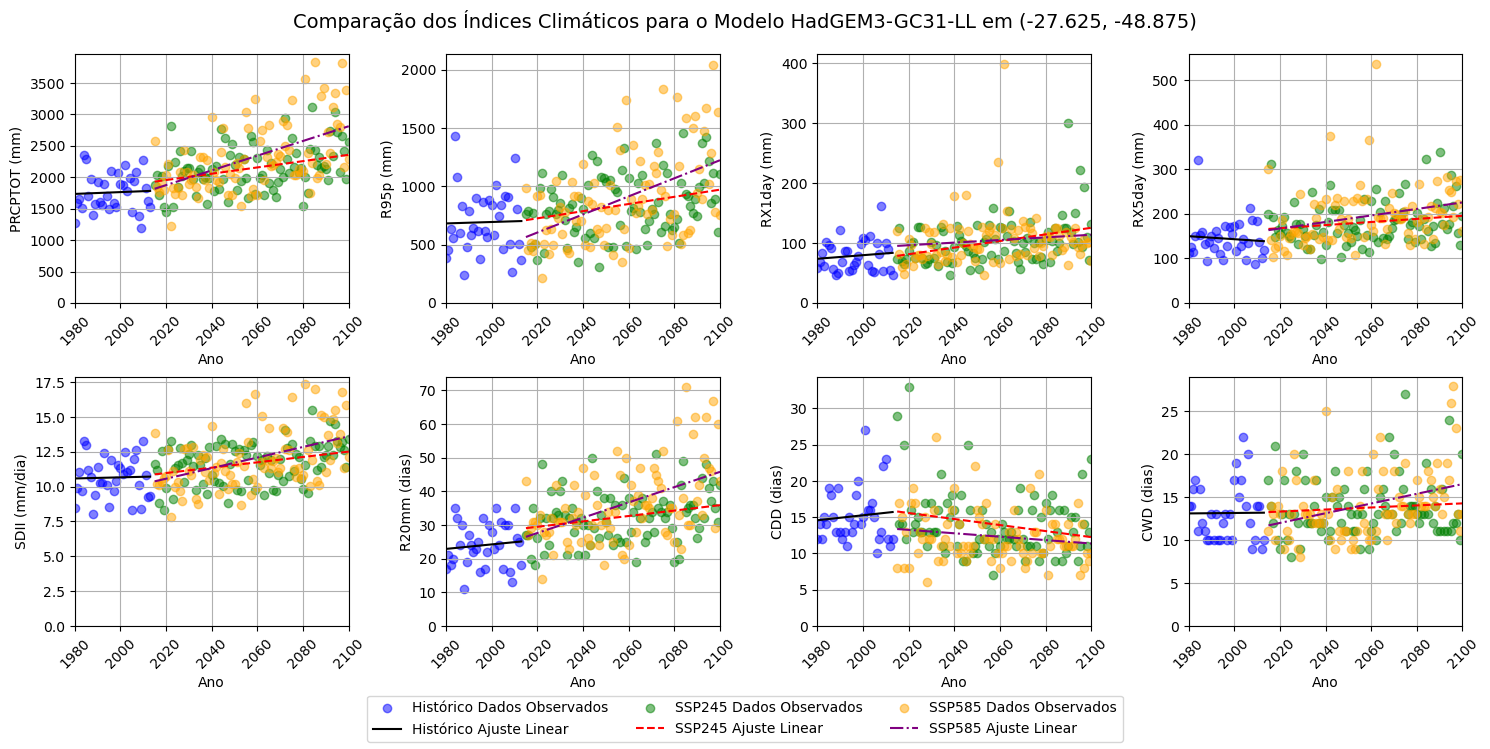

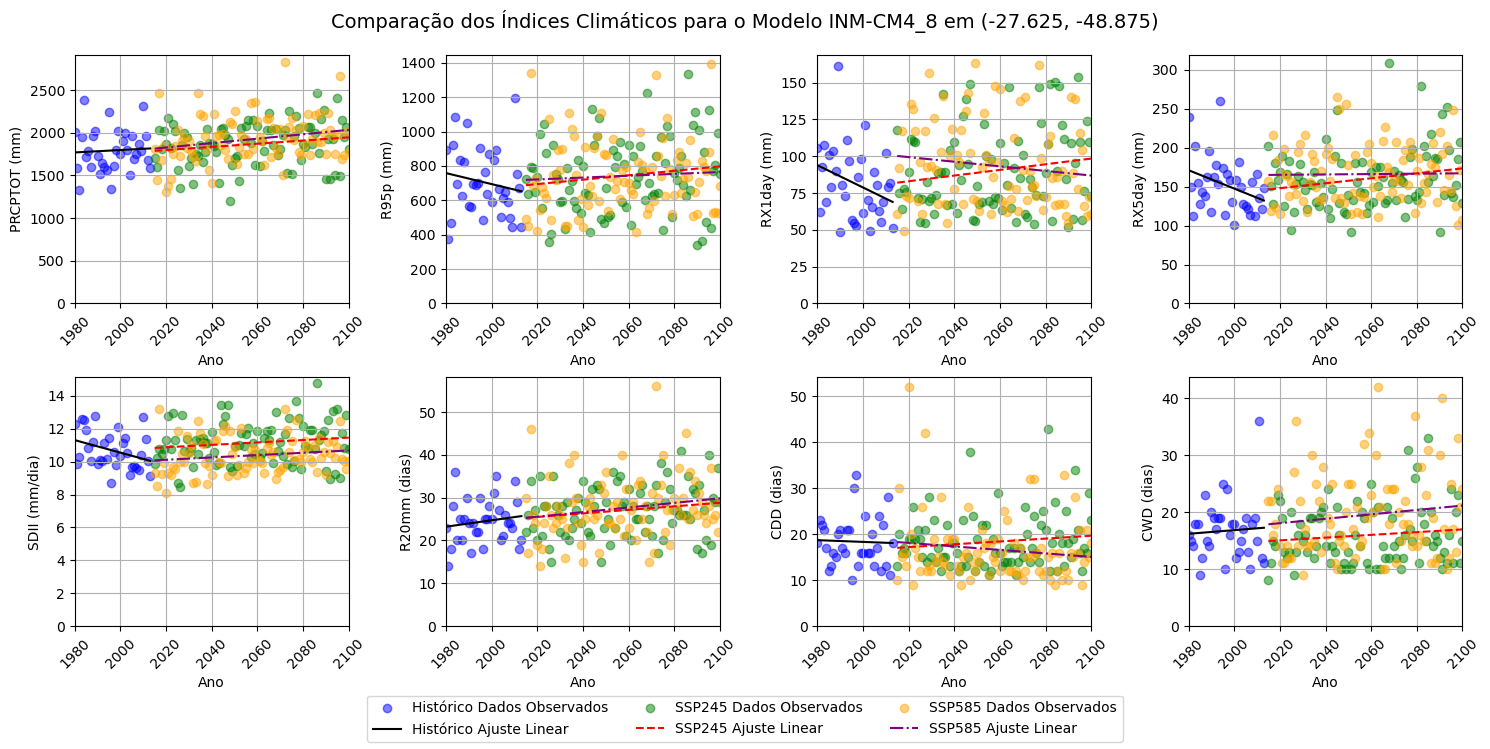

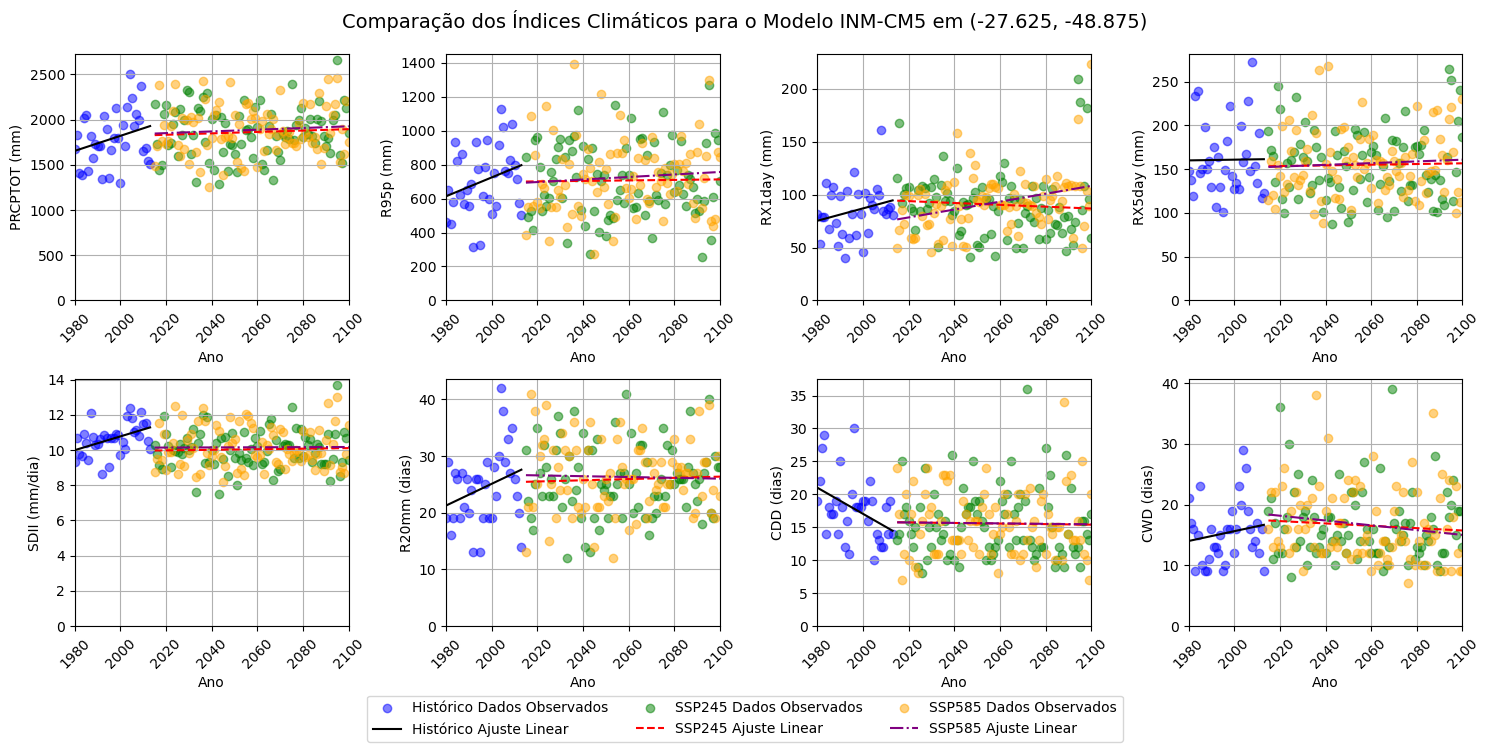

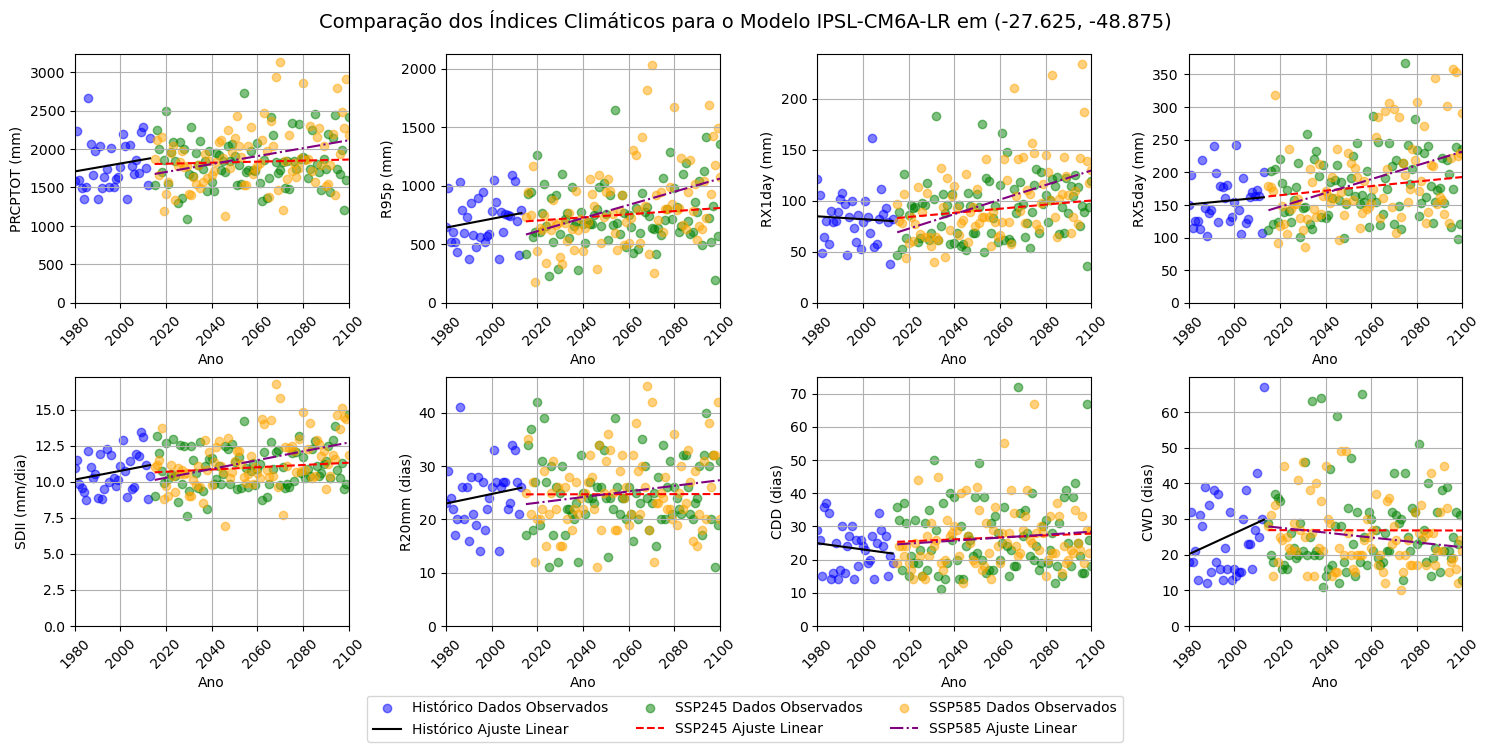

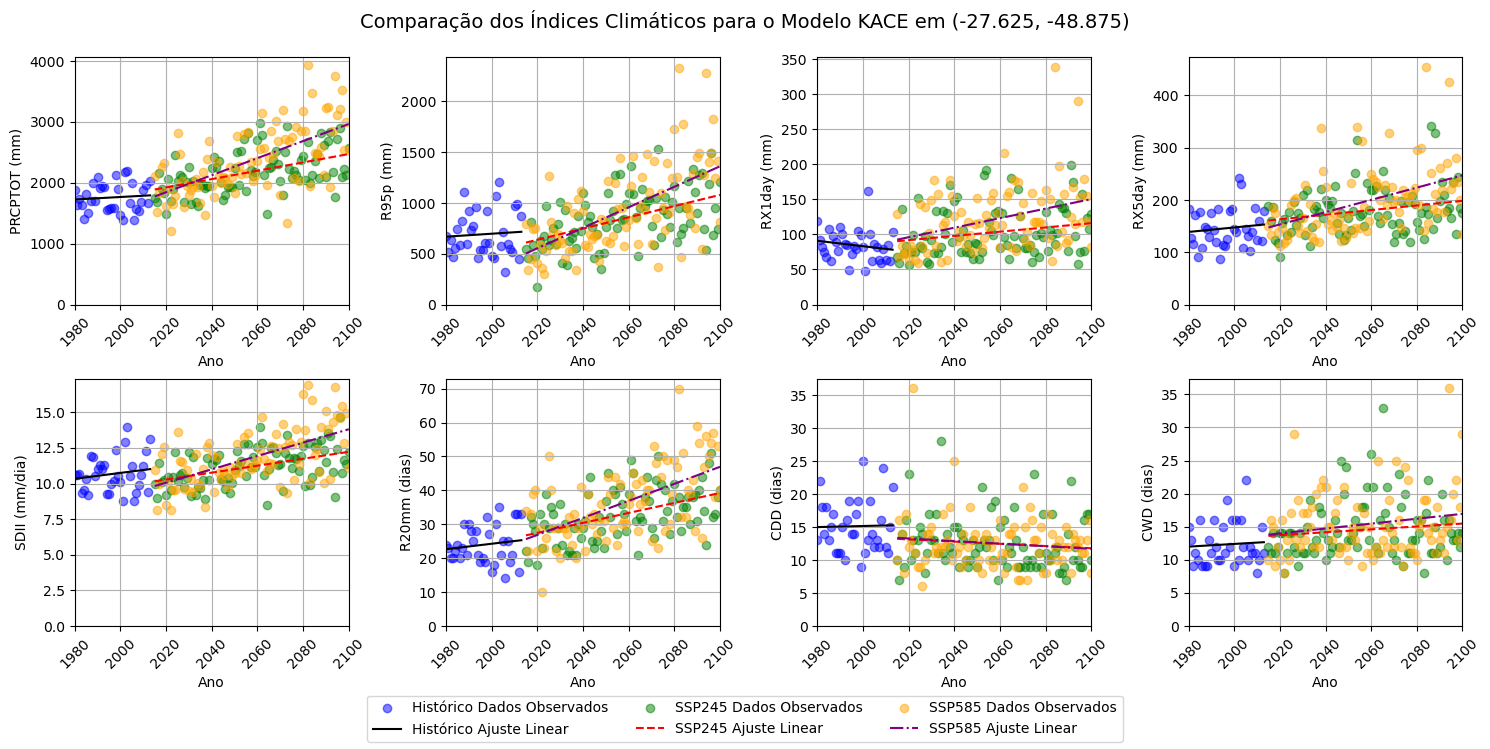

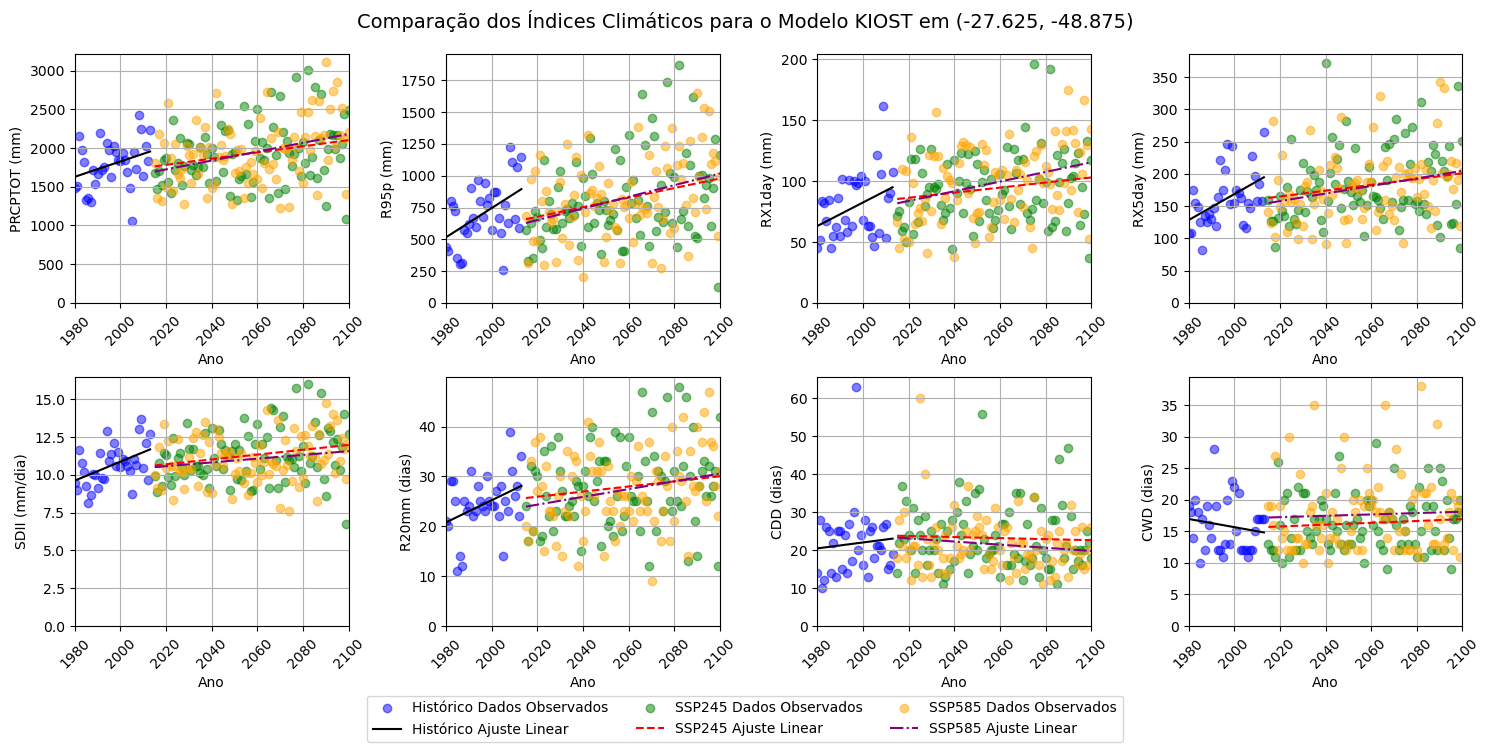

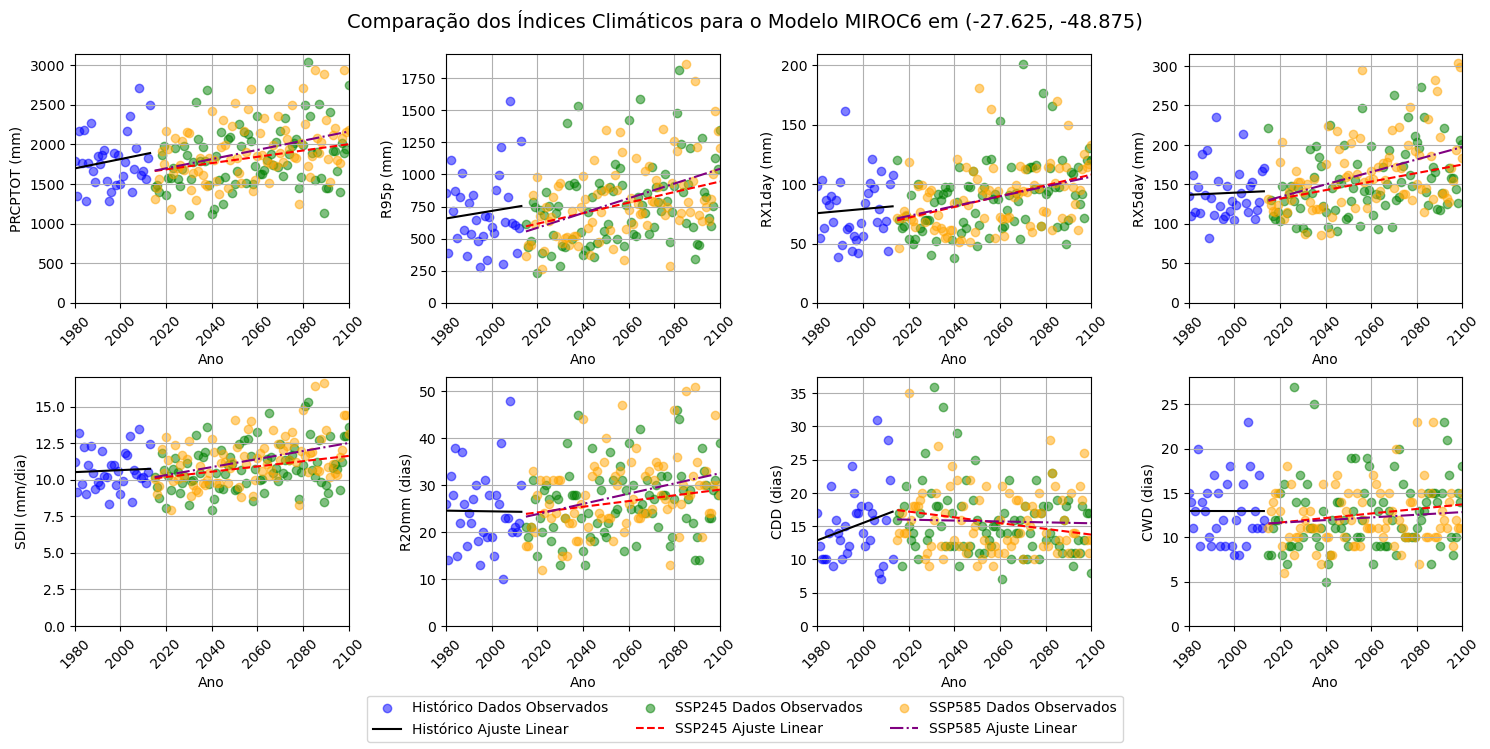

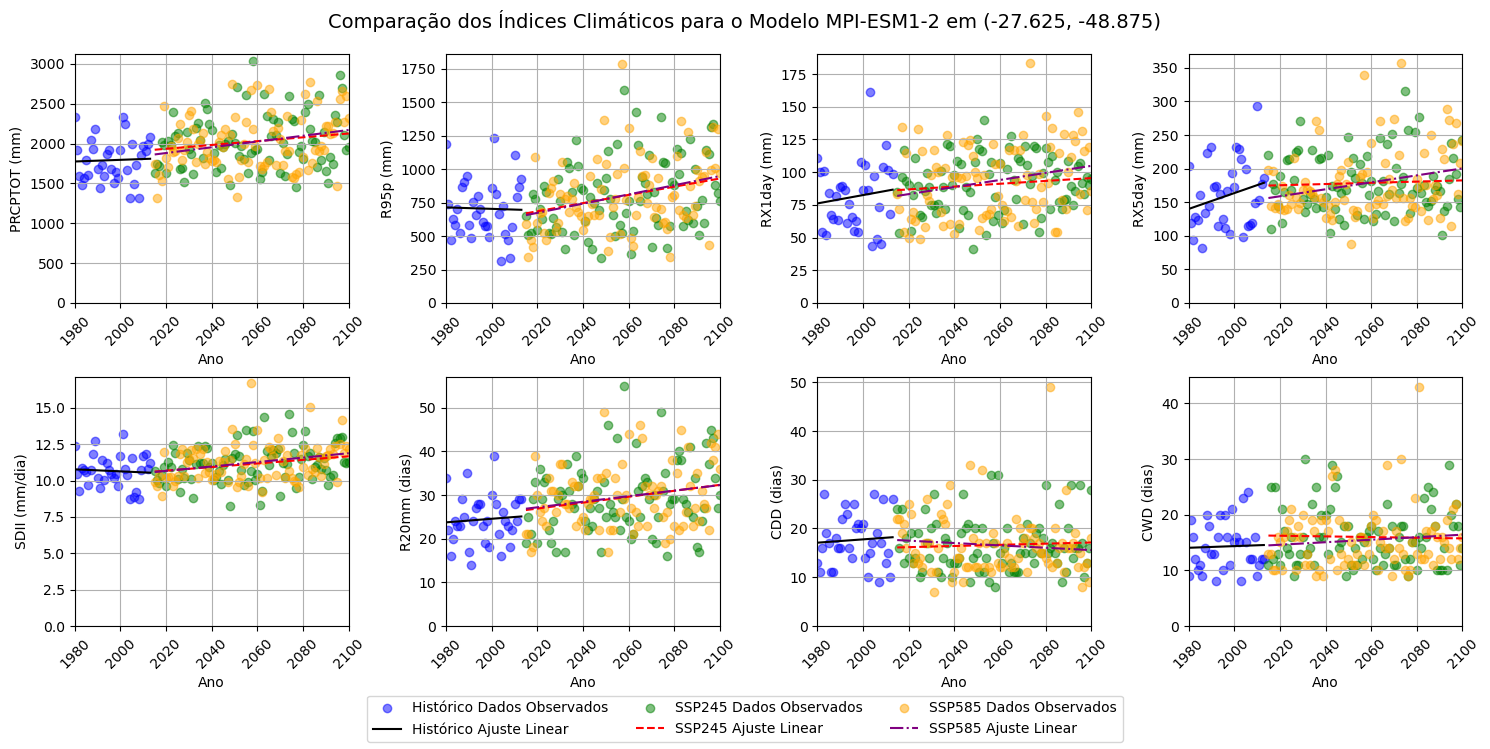

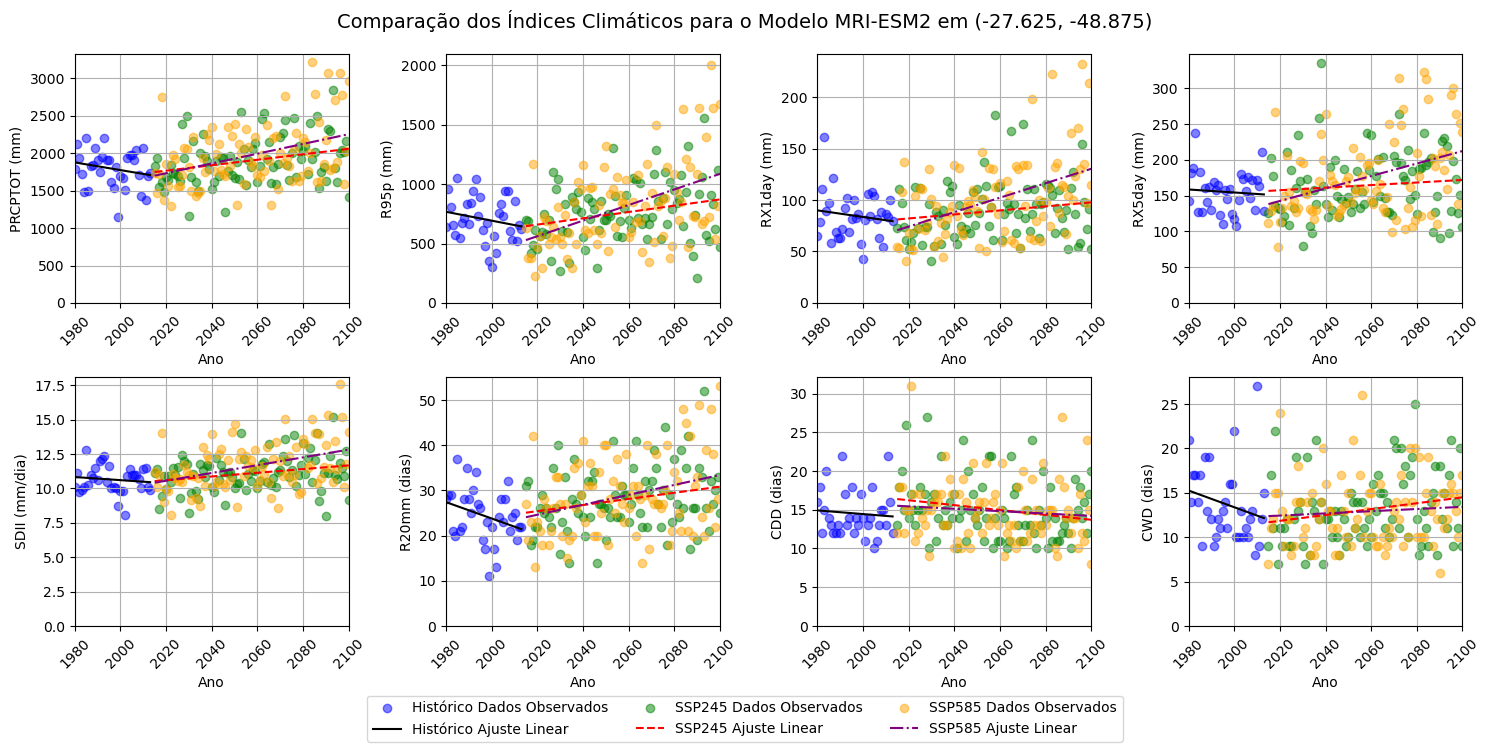

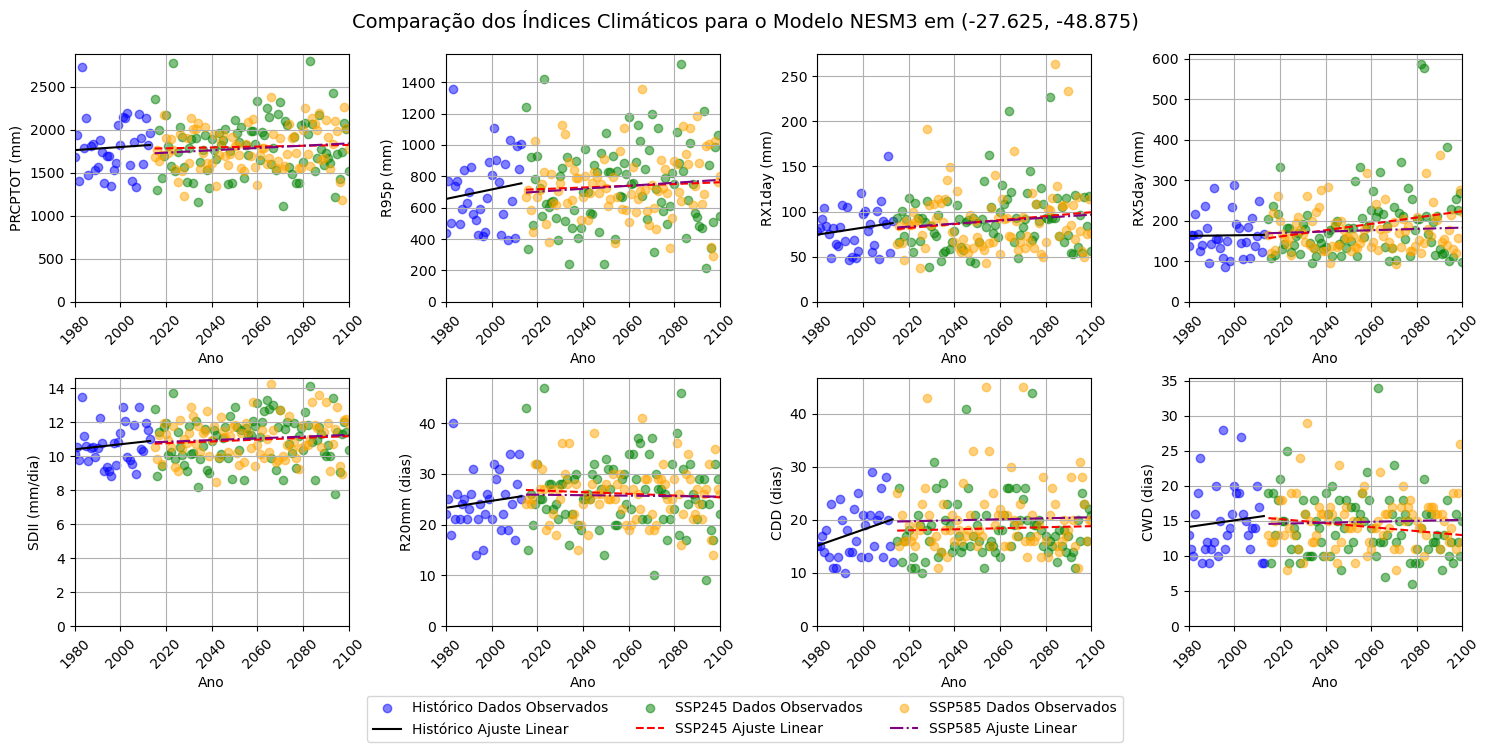

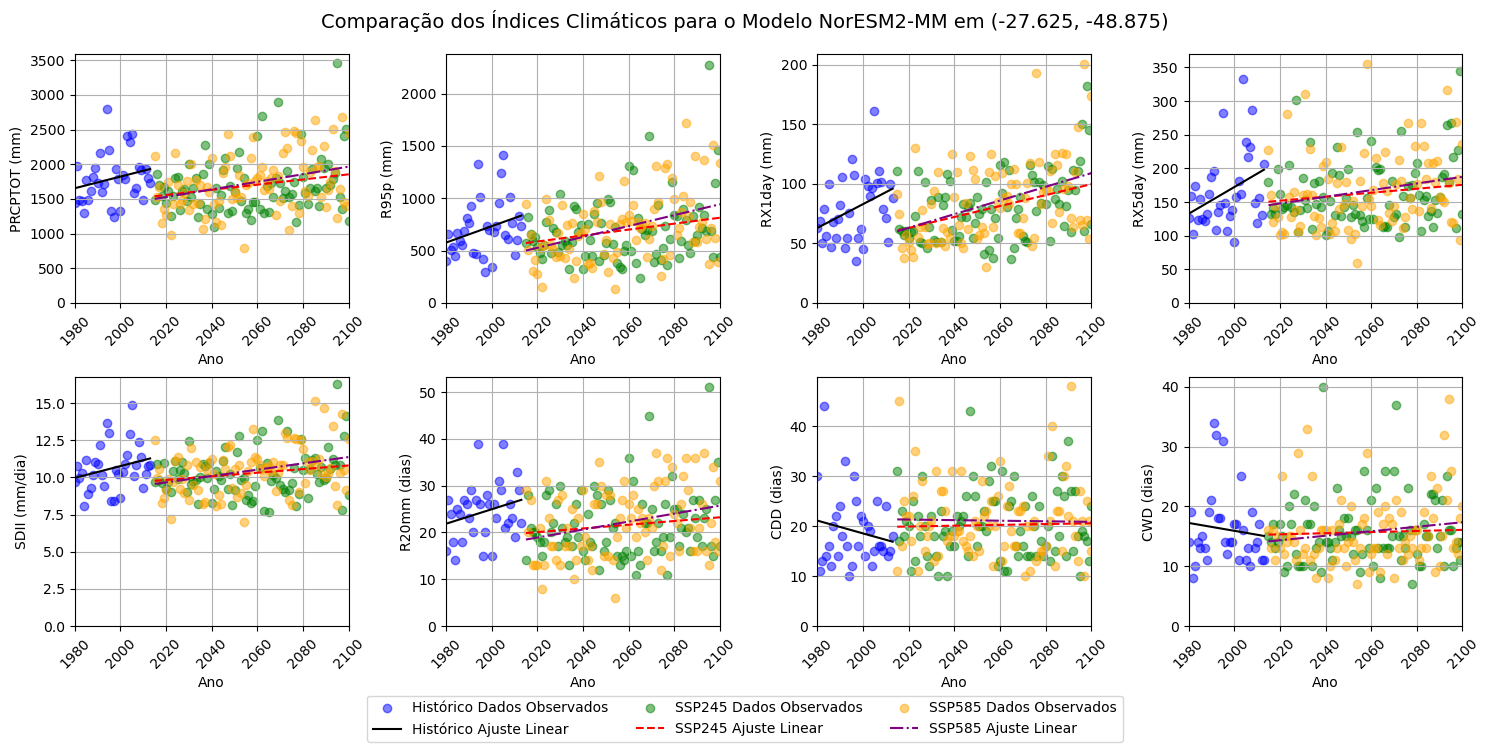

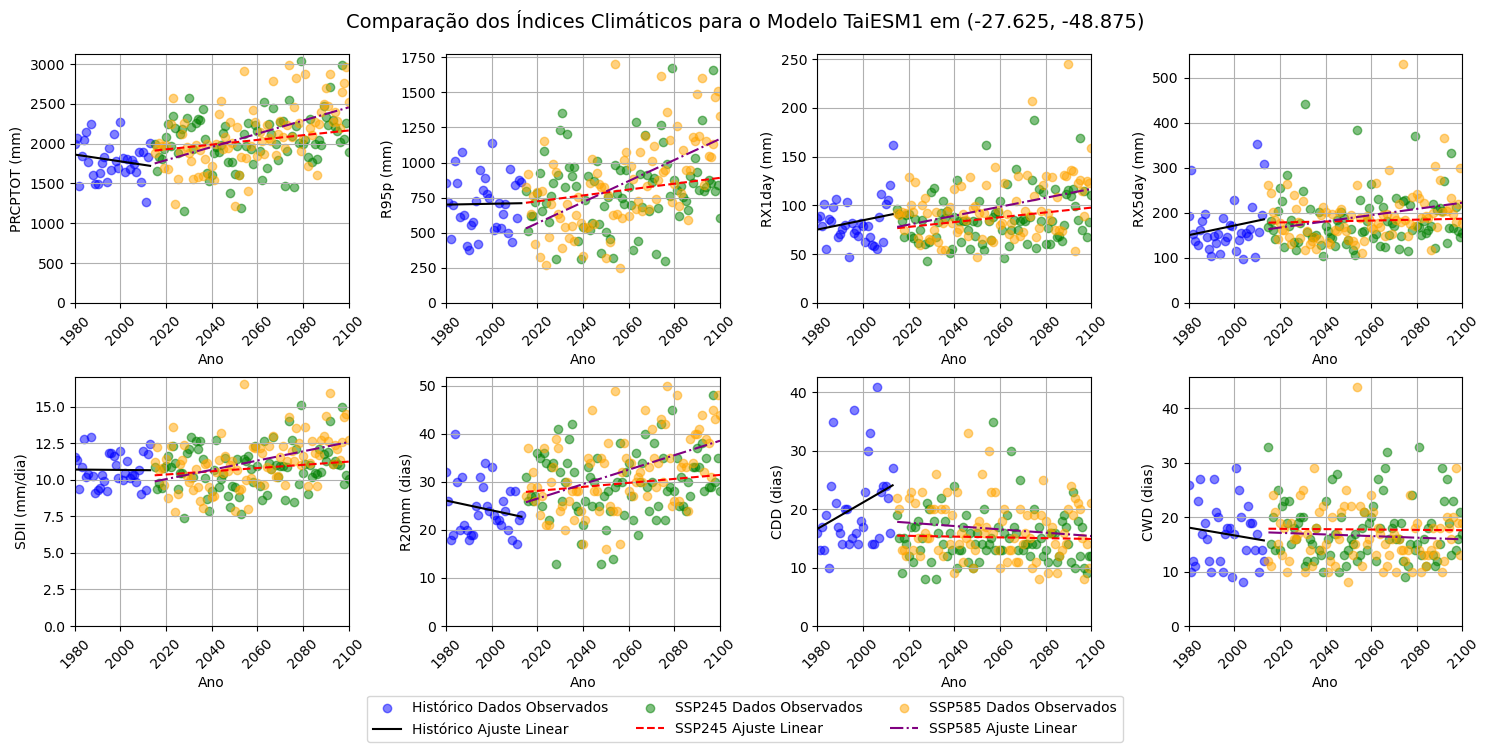

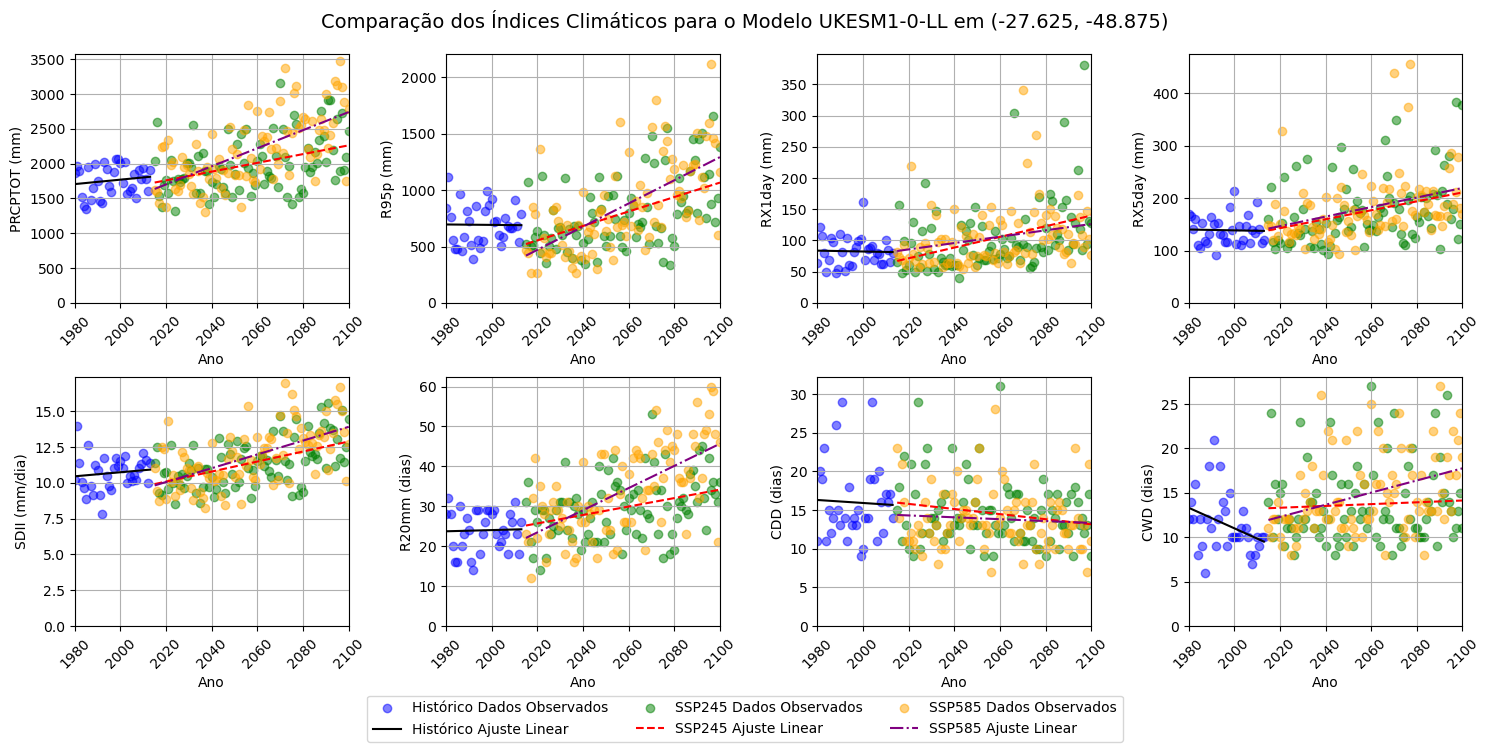

In [12]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Função para ajuste linear
def linear_func(x, a, b):
    return a * x + b

# Função para extrair os dados de precipitação
def extract_precipitation(file_path, target_lat, target_lon):
    try:
        dataset = nc.Dataset(file_path, 'r')
    except OSError as e:
        print(f"Erro ao abrir o arquivo: {e}")
        return None

    latitudes = dataset.variables['lat'][:]
    longitudes = dataset.variables['lon'][:]
    times = dataset.variables['time'][:]
    precipitation = dataset.variables['pr'][:]

    if target_lat not in latitudes or target_lon not in longitudes:
        print(f"Coordenadas exatas não encontradas no arquivo: {file_path}")
        dataset.close()
        return None

    lat_index = np.where(latitudes == target_lat)[0][0]
    lon_index = np.where(longitudes == target_lon)[0][0]

    time_units = dataset.variables['time'].units
    reference_date_str = time_units.split('since')[1].strip()
    reference_date = datetime.strptime(reference_date_str, "%Y-%m-%dT%H:%M:%S")
    dates = [reference_date + timedelta(days=float(t)) for t in times]

    precipitation_series = []

    def get_valid_precipitation(t_index, lat_index, lon_index):
        try:
            value = precipitation[t_index, lat_index, lon_index]
            if np.ma.is_masked(value) or np.isnan(value):
                return None
            return float(value)
        except IndexError:
            print(f"Erro de índice: t_index={t_index}, lat_index={lat_index}, lon_index={lon_index}")
            return None

    for t_index in range(len(dates)):
        mean_precipitation = get_valid_precipitation(t_index, lat_index, lon_index)
        if mean_precipitation is not None:
            precipitation_series.append((dates[t_index], mean_precipitation))

    dataset.close()
    return precipitation_series

# Função para calcular os índices climáticos
def calculate_indices(df):
    df['year'] = df['date'].dt.year
    df_wet_days = df[df['precipitation'] >= 1]

    prcptot = df_wet_days.groupby('year')['precipitation'].sum()
    r95_threshold = df['precipitation'].quantile(0.95)
    r95p = df[df['precipitation'] > r95_threshold].groupby('year')['precipitation'].sum()
    rx1day = df.groupby('year')['precipitation'].max()
    df['rolling_5day'] = df['precipitation'].rolling(window=5, min_periods=1).sum()
    rx5day = df.groupby('year')['rolling_5day'].max()
    sdii = df_wet_days.groupby('year')['precipitation'].mean()
    r20mm = df[df['precipitation'] > 20].groupby('year').size()
    df['dry'] = df['precipitation'] < 1
    cdd = df.groupby('year')['dry'].apply(lambda x: x.astype(int).groupby((x != x.shift()).cumsum()).sum().max())
    df['wet'] = df['precipitation'] >= 1
    cwd = df.groupby('year')['wet'].apply(lambda x: x.astype(int).groupby((x != x.shift()).cumsum()).sum().max())

    result_df = pd.DataFrame({
        'PRCPTOT': prcptot,
        'R95p': r95p,
        'RX1day': rx1day,
        'RX5day': rx5day,
        'SDII': sdii,
        'R20mm': r20mm,
        'CDD': cdd,
        'CWD': cwd
    }).reset_index()

    return result_df

# Coordenadas para Florianópolis
target_lat = -27.625
target_lon = -48.875

# Lista dos modelos a serem plotados
models = [
    'ACCESS-CM2', 'ACCESS-ESM1-5', 'CMCC-ESM2', 'EC-EARTH3', 'GFDL-CM4', 'GFDL-ESM4',
    'HadGEM3-GC31-LL', 'INM-CM4_8', 'INM-CM5', 'IPSL-CM6A-LR', 'KACE', 'KIOST', 'MIROC6',
    'MPI-ESM1-2', 'MRI-ESM2', 'NESM3', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL'
]

# Unidades das variáveis
units = {
    'PRCPTOT': '(mm)',
    'R95p': '(mm)',
    'RX1day': '(mm)',
    'RX5day': '(mm)',
    'SDII': '(mm/dia)',
    'R20mm': '(dias)',
    'CDD': '(dias)',
    'CWD': '(dias)'
}

# Plotar os gráficos para cada modelo
for model in models:
    files = {
        'Histórico': f'{model}-pr-hist.nc',
        'SSP245': f'{model}-pr-ssp245.nc',
        'SSP585': f'{model}-pr-ssp585.nc'
    }
    
    # Extrair dados e calcular índices
    indices = {}
    for label, file_path in files.items():
        series = extract_precipitation(file_path, target_lat, target_lon)
        if series:
            dates, values = zip(*series)
            df = pd.DataFrame({'date': dates, 'precipitation': values})
            indices[label] = calculate_indices(df)
        else:
            print(f"Não foi possível extrair dados do arquivo: {file_path}")

    # Plotar subplots 2x4 com cada índice variando ano a ano para o modelo atual
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    fig.suptitle(f'Comparação dos Índices Climáticos para o Modelo {model} em ({target_lat}, {target_lon})', fontsize=14, y=0.92)

    index_labels = ['PRCPTOT', 'R95p', 'RX1day', 'RX5day', 'SDII', 'R20mm', 'CDD', 'CWD']
    subplot_positions = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]

    colors = {'Histórico': 'blue', 'SSP245': 'green', 'SSP585': 'orange'}
    colors_lines = {'Histórico': 'black', 'SSP245': 'red', 'SSP585': 'purple'}
    linestyles = {'Histórico': '-', 'SSP245': '--', 'SSP585': '-.'}

    # Guardar handles e labels para a legenda global
    handles = []
    labels = []

    for i, label in enumerate(index_labels):
        ax = axes[subplot_positions[i][0], subplot_positions[i][1]]

        for scenario, df in indices.items():
            all_years = df['year'].values
            all_values = df[label].values

            # Ajuste linear para cada cenário
            popt_linear, _ = curve_fit(linear_func, all_years, all_values)

            # Previsão dos valores ajustados
            y_pred_linear = linear_func(all_years, *popt_linear)

            # Plotar os dados observados e a curva ajustada
            scatter = ax.scatter(all_years, all_values, color=colors[scenario], alpha=0.5)
            line, = ax.plot(all_years, y_pred_linear, color=colors_lines[scenario], linestyle=linestyles[scenario])

            # Adicionar handles e labels apenas na primeira execução
            if i == 0:
                handles.append(scatter)
                handles.append(line)
                labels.append(f'{scenario} Dados Observados')
                labels.append(f'{scenario} Ajuste Linear')

        ax.set_xlabel('Ano', fontsize=10)
        ax.set_ylabel(f'{label} {units[label]}', fontsize=10)
        ax.set_ylim(bottom=0)
        ax.set_xlim(1980, 2100)
        ax.tick_params(axis='both', labelsize=10)
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)

    # Ajustar o layout e adicionar a legenda global
    fig.tight_layout(rect=[0, 0, 1, 0.93])
    fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=10)
    plt.subplots_adjust(bottom=0.15)
    plt.show()

# Emsemble dos modelos

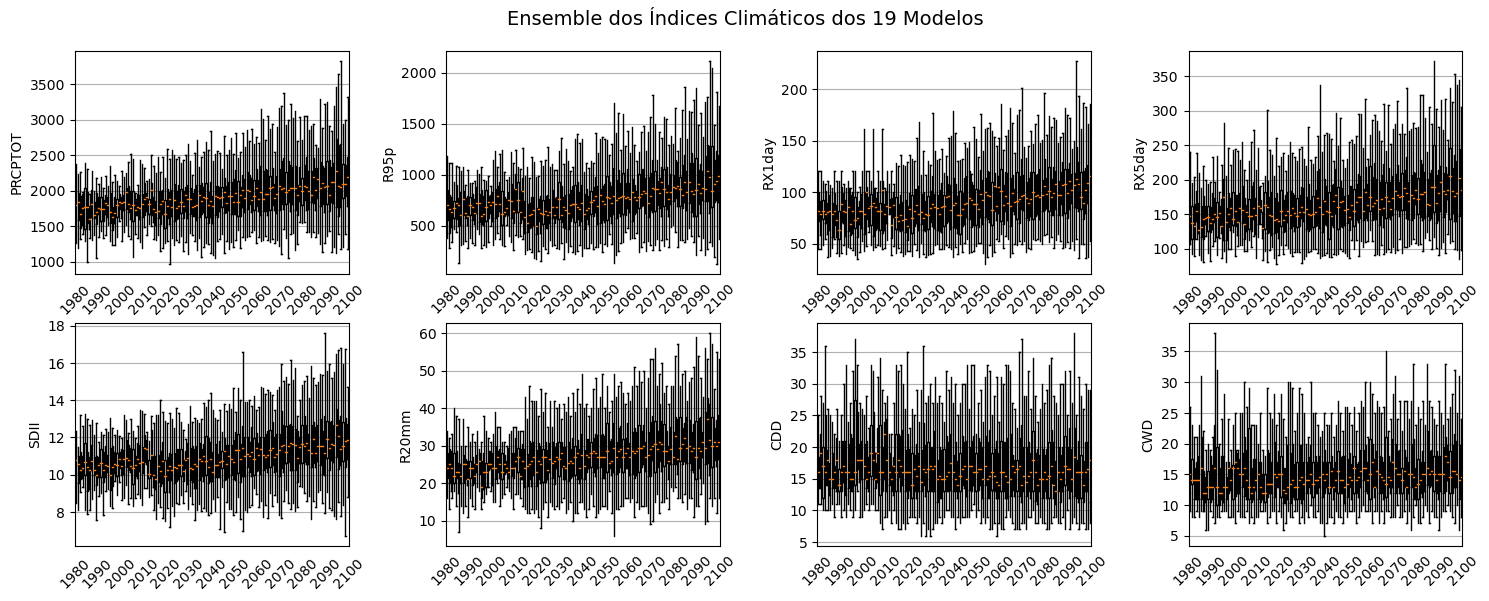

In [9]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Função para extrair os dados de precipitação
def extract_precipitation(file_path, target_lat, target_lon):
    try:
        dataset = nc.Dataset(file_path, 'r')
    except OSError as e:
        print(f"Erro ao abrir o arquivo: {e}")
        return None

    latitudes = dataset.variables['lat'][:]
    longitudes = dataset.variables['lon'][:]
    times = dataset.variables['time'][:]
    precipitation = dataset.variables['pr'][:]

    lat_index = np.abs(latitudes - target_lat).argmin()
    lon_index = np.abs(longitudes - target_lon).argmin()

    time_units = dataset.variables['time'].units
    reference_date_str = time_units.split('since')[1].strip()
    reference_date = datetime.strptime(reference_date_str, "%Y-%m-%dT%H:%M:%S")
    dates = [reference_date + timedelta(days=float(t)) for t in times]

    precipitation_series = [
        (dates[t_index], float(precipitation[t_index, lat_index, lon_index]))
        for t_index in range(len(dates))
        if not np.ma.is_masked(precipitation[t_index, lat_index, lon_index])
    ]

    dataset.close()
    return precipitation_series

# Função para calcular os índices climáticos
def calculate_indices(df):
    df['year'] = df['date'].dt.year
    df_wet_days = df[df['precipitation'] >= 1]

    prcptot = df_wet_days.groupby('year')['precipitation'].sum()
    r95_threshold = df['precipitation'].quantile(0.95)
    r95p = df[df['precipitation'] > r95_threshold].groupby('year')['precipitation'].sum()
    rx1day = df.groupby('year')['precipitation'].max()
    df['rolling_5day'] = df['precipitation'].rolling(window=5, min_periods=1).sum()
    rx5day = df.groupby('year')['rolling_5day'].max()
    sdii = df_wet_days.groupby('year')['precipitation'].mean()
    r20mm = df[df['precipitation'] > 20].groupby('year').size()
    df['dry'] = df['precipitation'] < 1
    cdd = df.groupby('year')['dry'].apply(lambda x: x.astype(int).groupby((x != x.shift()).cumsum()).sum().max())
    df['wet'] = df['precipitation'] >= 1
    cwd = df.groupby('year')['wet'].apply(lambda x: x.astype(int).groupby((x != x.shift()).cumsum()).sum().max())

    result_df = pd.DataFrame({
        'PRCPTOT': prcptot,
        'R95p': r95p,
        'RX1day': rx1day,
        'RX5day': rx5day,
        'SDII': sdii,
        'R20mm': r20mm,
        'CDD': cdd,
        'CWD': cwd
    }).reset_index()

    return result_df

# Coordenadas para Florianópolis
target_lat = -27.625
target_lon = -48.875

# Lista dos modelos a serem plotados
models = [
    'ACCESS-CM2', 'ACCESS-ESM1-5', 'CMCC-ESM2', 'EC-EARTH3', 'GFDL-CM4', 'GFDL-ESM4',
    'HadGEM3-GC31-LL', 'INM-CM4_8', 'INM-CM5', 'IPSL-CM6A-LR', 'KACE', 'KIOST', 'MIROC6',
    'MPI-ESM1-2', 'MRI-ESM2', 'NESM3', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL'
]

# Dicionário para armazenar os resultados de todos os modelos
ensemble_data = {index: {} for index in ['PRCPTOT', 'R95p', 'RX1day', 'RX5day', 'SDII', 'R20mm', 'CDD', 'CWD']}

for model in models:
    files = {
        'Histórico': f'{model}-pr-hist.nc',
        'SSP245': f'{model}-pr-ssp245.nc',
        'SSP585': f'{model}-pr-ssp585.nc'
    }
    
    # Extrair dados e calcular índices
    for scenario, file_path in files.items():
        series = extract_precipitation(file_path, target_lat, target_lon)
        if series:
            dates, values = zip(*series)
            df = pd.DataFrame({'date': pd.to_datetime(dates), 'precipitation': values})
            indices = calculate_indices(df)
            
            for index in ensemble_data:
                for _, row in indices.iterrows():
                    year = int(row['year'])  # Converter o ano para inteiro
                    if year not in ensemble_data[index]:
                        ensemble_data[index][year] = []
                    ensemble_data[index][year].append(row[index])

# Plotar os subplots 2x4 com boxplots para cada variável
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle(f'Ensemble dos Índices Climáticos dos 19 Modelos', fontsize=14, y=0.92)

index_labels = ['PRCPTOT', 'R95p', 'RX1day', 'RX5day', 'SDII', 'R20mm', 'CDD', 'CWD']
subplot_positions = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]

for i, index in enumerate(index_labels):
    ax = axes[subplot_positions[i][0], subplot_positions[i][1]]

    years = sorted([int(y) for y in ensemble_data[index].keys()])  # Converter anos para inteiros
    data = [ensemble_data[index][year] for year in years]

    ax.boxplot(data, labels=years, showfliers=False)
    ax.set_xlabel('', fontsize=10)
    ax.set_ylabel(index, fontsize=10)
    ax.tick_params(axis='both', labelsize=10)
    ax.grid(True)

    # Remover os ticks do eixo x
    ax.set_xticks([])

    # Adicionar uma caixa de texto com os anos cheios no local correto
    for year in range(1980, 2101, 10):
        ax.text(ax.get_xlim()[0] + (year-1980), ax.get_ylim()[0] - 0.02 * ax.get_ylim()[1], str(year), ha='center', va='top', fontsize=10, rotation=45)

fig.tight_layout(rect=[0, 0, 1, 0.93])
plt.subplots_adjust(bottom=0.25)  # Ajuste para evitar o corte dos rótulos inferiores
plt.show()

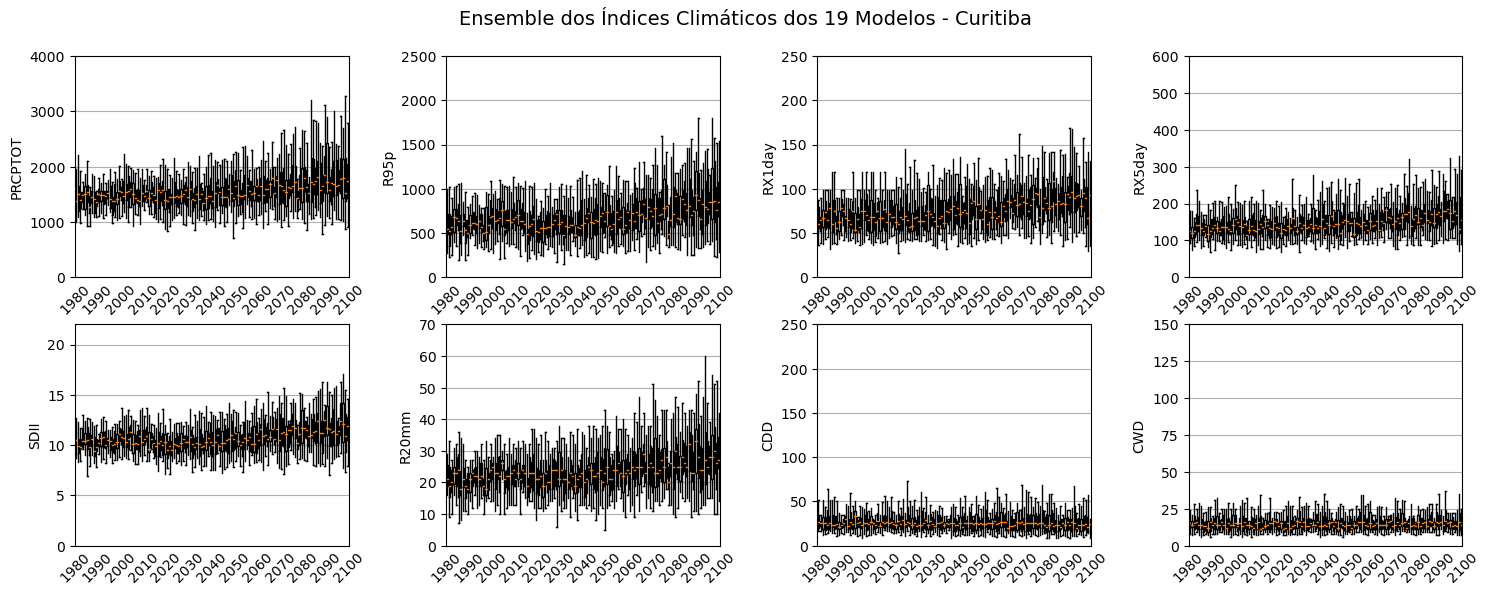

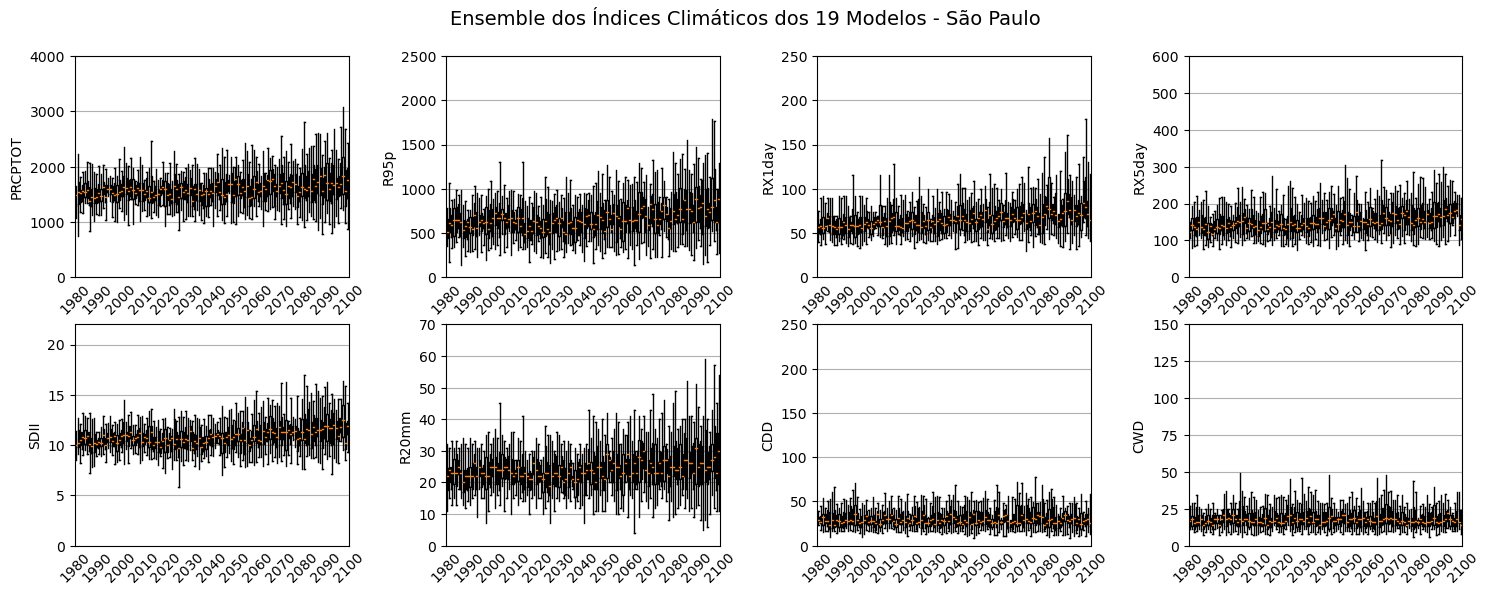

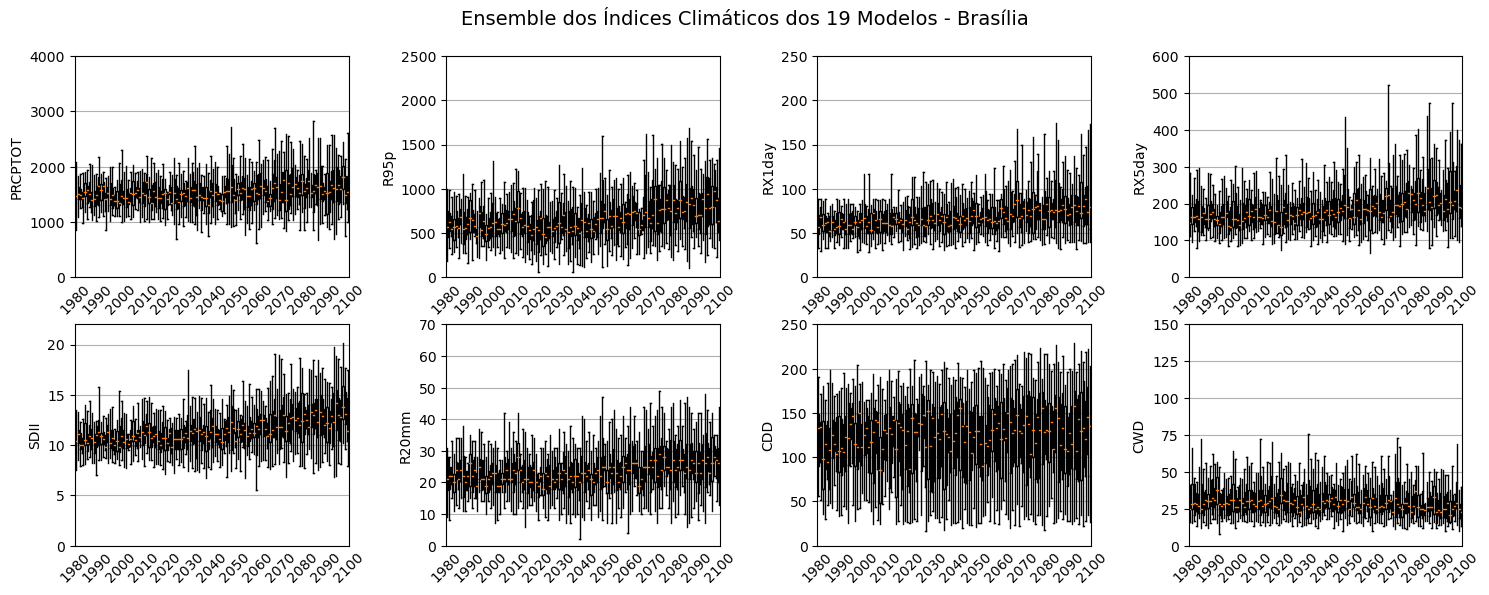

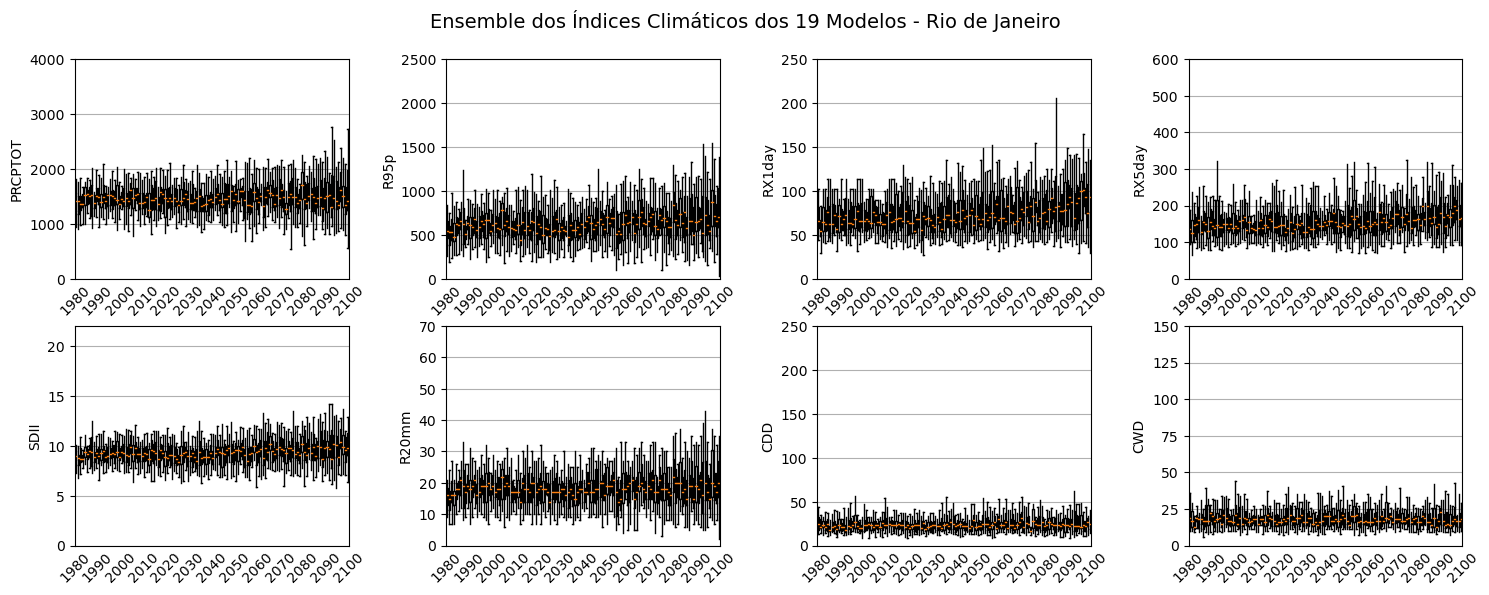

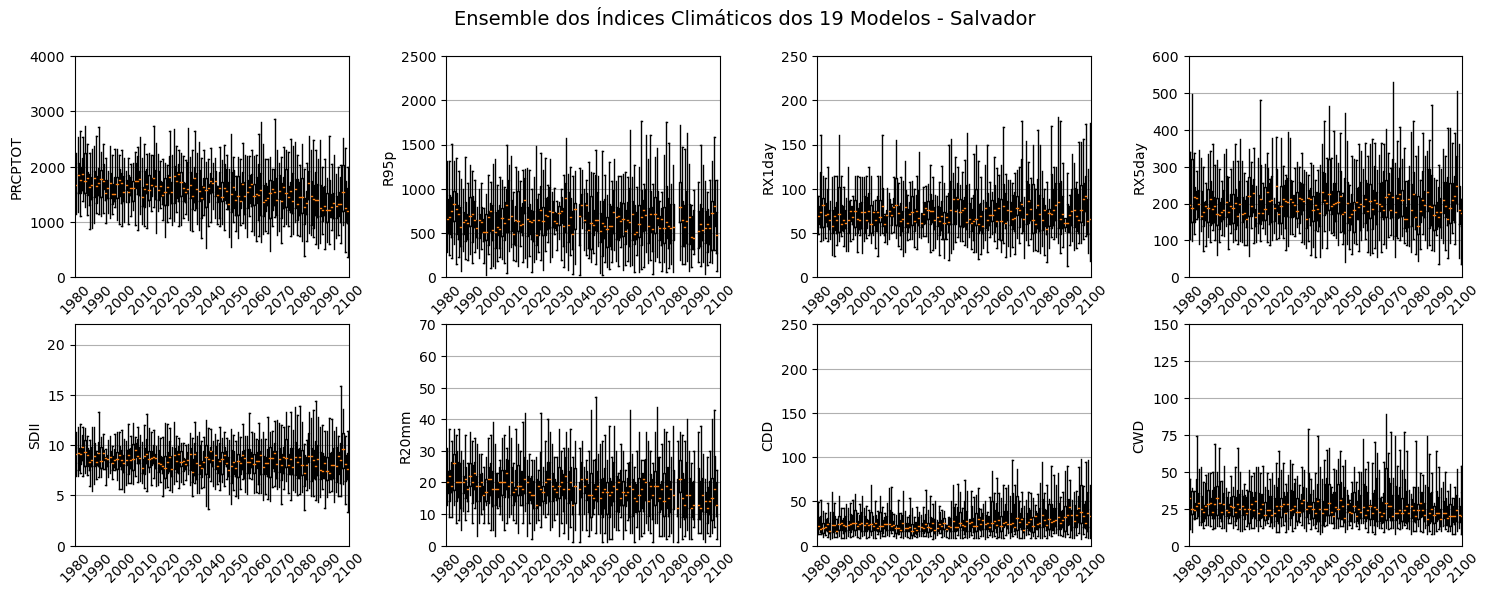

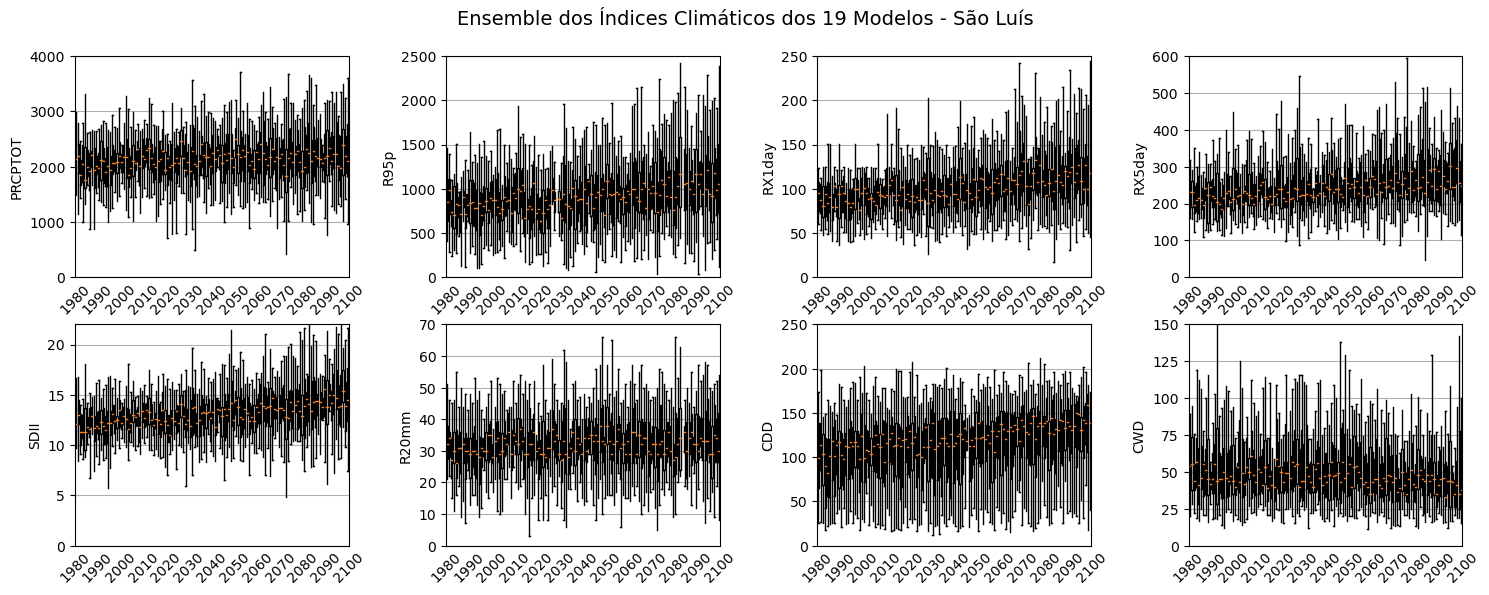

In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Função para extrair os dados de precipitação (igual à original)
def extract_precipitation(file_path, target_lat, target_lon):
    try:
        dataset = nc.Dataset(file_path, 'r')
    except OSError as e:
        print(f"Erro ao abrir o arquivo: {e}")
        return None

    latitudes = dataset.variables['lat'][:]
    longitudes = dataset.variables['lon'][:]
    times = dataset.variables['time'][:]
    precipitation = dataset.variables['pr'][:]

    lat_index = np.abs(latitudes - target_lat).argmin()
    lon_index = np.abs(longitudes - target_lon).argmin()

    time_units = dataset.variables['time'].units
    reference_date_str = time_units.split('since')[1].strip()
    reference_date = datetime.strptime(reference_date_str, "%Y-%m-%dT%H:%M:%S")
    dates = [reference_date + timedelta(days=float(t)) for t in times]

    precipitation_series = [
        (dates[t_index], float(precipitation[t_index, lat_index, lon_index]))
        for t_index in range(len(dates))
        if not np.ma.is_masked(precipitation[t_index, lat_index, lon_index])
    ]

    dataset.close()
    return precipitation_series

# Função para calcular os índices climáticos (igual à original)
def calculate_indices(df):
    df['year'] = df['date'].dt.year
    df_wet_days = df[df['precipitation'] >= 1]

    prcptot = df_wet_days.groupby('year')['precipitation'].sum()
    r95_threshold = df['precipitation'].quantile(0.95)
    r95p = df[df['precipitation'] > r95_threshold].groupby('year')['precipitation'].sum()
    rx1day = df.groupby('year')['precipitation'].max()
    df['rolling_5day'] = df['precipitation'].rolling(window=5, min_periods=1).sum()
    rx5day = df.groupby('year')['rolling_5day'].max()
    sdii = df_wet_days.groupby('year')['precipitation'].mean()
    r20mm = df[df['precipitation'] > 20].groupby('year').size()
    df['dry'] = df['precipitation'] < 1
    cdd = df.groupby('year')['dry'].apply(lambda x: x.astype(int).groupby((x != x.shift()).cumsum()).sum().max())
    df['wet'] = df['precipitation'] >= 1
    cwd = df.groupby('year')['wet'].apply(lambda x: x.astype(int).groupby((x != x.shift()).cumsum()).sum().max())

    result_df = pd.DataFrame({
        'PRCPTOT': prcptot,
        'R95p': r95p,
        'RX1day': rx1day,
        'RX5day': rx5day,
        'SDII': sdii,
        'R20mm': r20mm,
        'CDD': cdd,
        'CWD': cwd
    }).reset_index()

    return result_df

# Coordenadas das cidades ajustadas
cities_coords = {
    "Curitiba": (-25.375, -49.125),
    "São Paulo": (-23.625, -46.625),
    "Brasília": (-15.875, -47.875),
    "Rio de Janeiro": (-22.875, -43.375),
    "Salvador": (-12.875, -38.375),
    "São Luís": (-2.625, -44.375)
}

# Lista dos modelos a serem plotados (igual à original)
models = [
    'ACCESS-CM2', 'ACCESS-ESM1-5', 'CMCC-ESM2', 'EC-EARTH3', 'GFDL-CM4', 'GFDL-ESM4',
    'HadGEM3-GC31-LL', 'INM-CM4_8', 'INM-CM5', 'IPSL-CM6A-LR', 'KACE', 'KIOST', 'MIROC6',
    'MPI-ESM1-2', 'MRI-ESM2', 'NESM3', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL'
]

# Definindo os limites de y para cada variável
y_limits = {
    'PRCPTOT': (0, 4000),
    'R95p': (0, 2500),
    'RX1day': (0, 250),
    'RX5day': (0, 600),
    'SDII': (0, 22),
    'R20mm': (0, 70),
    'CDD': (0, 250),
    'CWD': (0, 150)
}

# Loop sobre as cidades
for city, (target_lat, target_lon) in cities_coords.items():
    ensemble_data = {index: {} for index in ['PRCPTOT', 'R95p', 'RX1day', 'RX5day', 'SDII', 'R20mm', 'CDD', 'CWD']}
    
    for model in models:
        files = {
            'Histórico': f'{model}-pr-hist.nc',
            'SSP585': f'{model}-pr-ssp585.nc'
        }
        
        # Extrair dados e calcular índices
        for scenario, file_path in files.items():
            series = extract_precipitation(file_path, target_lat, target_lon)
            if series:
                dates, values = zip(*series)
                df = pd.DataFrame({'date': pd.to_datetime(dates), 'precipitation': values})
                indices = calculate_indices(df)
                
                for index in ensemble_data:
                    for _, row in indices.iterrows():
                        year = int(row['year'])
                        if year not in ensemble_data[index]:
                            ensemble_data[index][year] = []
                        ensemble_data[index][year].append(row[index])

    # Plotar os subplots 2x4 com boxplots para cada variável
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    fig.suptitle(f'Ensemble dos Índices Climáticos dos 19 Modelos - {city}', fontsize=14, y=0.92)

    index_labels = ['PRCPTOT', 'R95p', 'RX1day', 'RX5day', 'SDII', 'R20mm', 'CDD', 'CWD']
    subplot_positions = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]

    for i, index in enumerate(index_labels):
        ax = axes[subplot_positions[i][0], subplot_positions[i][1]]

        years = sorted([int(y) for y in ensemble_data[index].keys()])
        data = [ensemble_data[index][year] for year in years if ensemble_data[index][year]]  # Apenas anos com dados

        if data:
            ax.boxplot(data, labels=[year for year in years if ensemble_data[index][year]], showfliers=False)
        ax.set_xlabel('', fontsize=10)
        ax.set_ylabel(index, fontsize=10)
        ax.tick_params(axis='both', labelsize=10)
        ax.grid(True)

        # Definir os limites do eixo y conforme solicitado
        ax.set_ylim(y_limits[index])

        # Remover os ticks do eixo x
        ax.set_xticks([])

        # Adicionar uma caixa de texto com os anos cheios no local correto
        for year in range(1980, 2101, 10):
            ax.text(ax.get_xlim()[0] + (year-1980), ax.get_ylim()[0] - 0.02 * ax.get_ylim()[1], str(year), ha='center', va='top', fontsize=10, rotation=45)

    fig.tight_layout(rect=[0, 0, 1, 0.93])
    plt.subplots_adjust(bottom=0.25)
    plt.show()


# Criar os modelos para o Netuno

In [2]:
import os
import netCDF4 as nc
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Função para extrair os dados de precipitação
def extract_precipitation(file_path, target_lat, target_lon):
    try:
        dataset = nc.Dataset(file_path, 'r')
    except OSError as e:
        print(f"Erro ao abrir o arquivo: {e}")
        return None

    latitudes = dataset.variables['lat'][:]
    longitudes = dataset.variables['lon'][:]
    times = dataset.variables['time'][:]
    precipitation = dataset.variables['pr'][:]

    if target_lat not in latitudes or target_lon not in longitudes:
        print(f"Coordenadas exatas não encontradas no arquivo: {file_path}")
        dataset.close()
        return None

    lat_index = np.where(latitudes == target_lat)[0][0]
    lon_index = np.where(longitudes == target_lon)[0][0]

    time_units = dataset.variables['time'].units
    reference_date_str = time_units.split('since')[1].strip()
    reference_date = datetime.strptime(reference_date_str, "%Y-%m-%dT%H:%M:%S")
    dates = [reference_date + timedelta(days=float(t)) for t in times]

    precipitation_series = []

    def get_valid_precipitation(t_index, lat_index, lon_index):
        try:
            value = precipitation[t_index, lat_index, lon_index]
            if np.ma.is_masked(value) or np.isnan(value):
                return None
            return float(value)
        except IndexError:
            print(f"Erro de índice: t_index={t_index}, lat_index={lon_index}")
            return None

    for t_index in range(len(dates)):
        mean_precipitation = get_valid_precipitation(t_index, lat_index, lon_index)
        if mean_precipitation is not None:
            precipitation_series.append((dates[t_index], mean_precipitation))

    dataset.close()
    return precipitation_series

# Função para filtrar os dados com base em uma janela de tempo específica
def filter_precipitation_by_date(precipitation_series, start_date, end_date):
    filtered_data = [(date, value) for date, value in precipitation_series if start_date <= date <= end_date]
    return filtered_data

# Função para gerar e salvar os CSVs
def generate_csvs_for_city(model, city, coords, folder_path):
    files = {
        'Histórico': f'{model}-pr-hist.nc',
        'SSP245': f'{model}-pr-ssp245.nc',
        'SSP585': f'{model}-pr-ssp585.nc'
    }
    
    for scenario_label, (start_date_str, end_date_str) in scenarios.items():
        file_key = 'Histórico' if scenario_label == 'Histórico' else scenario_label.split('_')[0]
        file_path = files[file_key]

        # Extraindo os dados dos arquivos .nc
        series = extract_precipitation(file_path, coords[0], coords[1])
        
        if series:
            filtered_series = filter_precipitation_by_date(series, datetime.strptime(start_date_str, '%Y-%m-%d'), datetime.strptime(end_date_str, '%Y-%m-%d'))
            
            df = pd.DataFrame(filtered_series, columns=['date', 'precipitation'])
            output_filename = os.path.join(folder_path, f'{city}_{model}_{scenario_label}_{start_date_str}_to_{end_date_str}.csv')
            df.to_csv(output_filename, index=False)
            print(f'Arquivo gerado: {output_filename}')
        else:
            print(f"Não foi possível extrair dados do arquivo: {file_path}")

# Criar a pasta e mudar para ela
folder_path = 'arquivos_netuno_csvs'
os.makedirs(folder_path, exist_ok=True)
os.chdir(folder_path)

# Coordenadas das cidades ajustadas
cities_coords = {
    "Curitiba": (-25.375, -49.125),
    "São Paulo": (-23.625, -46.625),
    "Brasília": (-15.875, -47.875),
    "Rio de Janeiro": (-22.875, -43.375),
    "Salvador": (-12.875, -38.375),
    "São Luís": (-2.625, -44.375)
}

# Lista dos modelos a serem considerados
models = [
    'ACCESS-CM2', 'ACCESS-ESM1-5', 'CMCC-ESM2', 'EC-EARTH3', 'GFDL-CM4', 'GFDL-ESM4',
    'HadGEM3-GC31-LL', 'INM-CM4_8', 'INM-CM5', 'IPSL-CM6A-LR', 'KACE', 'KIOST', 'MIROC6',
    'MPI-ESM1-2', 'MRI-ESM2', 'NESM3', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL'
]

# Cenários e períodos a serem analisados
scenarios = {
    'Histórico': ('1980-01-01', '2000-01-01'),
    'SSP245_2015_2035': ('2015-01-01', '2035-01-01'),
    'SSP585_2015_2035': ('2015-01-01', '2035-01-01'),
    'SSP245_2040_2060': ('2040-01-01', '2060-01-01'),
    'SSP585_2040_2060': ('2040-01-01', '2060-01-01'),
    'SSP245_2060_2080': ('2060-01-01', '2080-01-01'),
    'SSP585_2060_2080': ('2060-01-01', '2080-01-01'),
    'SSP245_2024_2074': ('2024-01-01', '2074-01-01'),
    'SSP585_2024_2074': ('2024-01-01', '2074-01-01')
}

# Executar para cada modelo e cidade
for city, coords in cities_coords.items():
    for model in models:
        generate_csvs_for_city(model, city, coords, folder_path)

# Voltar para o diretório anterior
os.chdir('..')


Arquivo gerado: arquivos_netuno_csvs\Curitiba_ACCESS-CM2_Histórico_1980-01-01_to_2000-01-01.csv
Arquivo gerado: arquivos_netuno_csvs\Curitiba_ACCESS-CM2_SSP245_2015_2035_2015-01-01_to_2035-01-01.csv
Arquivo gerado: arquivos_netuno_csvs\Curitiba_ACCESS-CM2_SSP585_2015_2035_2015-01-01_to_2035-01-01.csv
Arquivo gerado: arquivos_netuno_csvs\Curitiba_ACCESS-CM2_SSP245_2040_2060_2040-01-01_to_2060-01-01.csv
Arquivo gerado: arquivos_netuno_csvs\Curitiba_ACCESS-CM2_SSP585_2040_2060_2040-01-01_to_2060-01-01.csv
Arquivo gerado: arquivos_netuno_csvs\Curitiba_ACCESS-CM2_SSP245_2060_2080_2060-01-01_to_2080-01-01.csv
Arquivo gerado: arquivos_netuno_csvs\Curitiba_ACCESS-CM2_SSP585_2060_2080_2060-01-01_to_2080-01-01.csv
Arquivo gerado: arquivos_netuno_csvs\Curitiba_ACCESS-CM2_SSP245_2024_2074_2024-01-01_to_2074-01-01.csv
Arquivo gerado: arquivos_netuno_csvs\Curitiba_ACCESS-CM2_SSP585_2024_2074_2024-01-01_to_2074-01-01.csv
Arquivo gerado: arquivos_netuno_csvs\Curitiba_ACCESS-ESM1-5_Histórico_1980-01-01